## Basic req

In [ ]:
# !pip install unrar
# !unrar x /content/drive/MyDrive/EBHI-SEG.rar

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from ipywidgets import interact, interactive, fixed, AppLayout

from skimage.exposure import match_histograms
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA

from skimage.feature import graycomatrix, graycoprops
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import xgboost as xgb

from skimage.feature import hog

from sklearn.metrics import precision_score, recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb

from scipy.stats import entropy, kurtosis, skew
from sklearn.metrics import confusion_matrix

## Not required - Failed Experiments

In [ ]:
# # 't' decides the type of thresholding to apply
# # No use of 'val' in case of Otsu's thresholding

# def explore_image(val, img, t):

#   if t==0:
#     output, thresh = cv2.threshold(img, val, 255, cv2.THRESH_BINARY)

#   elif t==1:
#     thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, val)

#   elif t==2:
#     output, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#   cv2_imshow(thresh)

In [ ]:
# cv2_imshow(img3[:, :, 0])
# hist = cv2.calcHist([img3],[0],None,[256],[0,256])
# plt.plot(hist, color='b')
# plt.show()
# i1 = interact(explore_image, val=(0, 20), img = fixed(img3[:, :, 0]), t = fixed(0))

# cv2_imshow(img3[:, :, 1])
# hist = cv2.calcHist([img3],[1],None,[256],[0,256])
# plt.plot(hist, color='g')
# plt.show()
# i1 = interact(explore_image, val=(0, 20), img = fixed(img3[:, :, 1]), t = fixed(0))

# cv2_imshow(img3[:, :, 2])
# hist = cv2.calcHist([img3],[2],None,[256],[0,256])
# plt.plot(hist, color='r')
# plt.show()
# i1 = interact(explore_image, val=(0, 20), img = fixed(img3[:, :, 2]), t = fixed(0))

In [ ]:
# cv2_imshow(img3[:, :, 2])
# hist = cv2.calcHist([img3],[2],None,[256],[0,256])
# plt.plot(hist, color='r')
# plt.show()
# i1 = interact(explore_image, val=(0, 255), img = fixed(img3[:, :, 2]), t = fixed(0))
# im = cv2.equalizeHist(img3[:, :, 2])
# i1 = interact(explore_image, val=(0, 255), img = fixed(im), t = fixed(0))

In [ ]:
# p = '/content/EBHI-SEG/Serrated adenoma/'
# l = os.listdir(p+'image/')


# for i in range(30):
#   img = cv2.imread(p+'image/'+l[i])
#   cv2_imshow(img)

#   hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#   # print(hsv.shape)

#   cv2_imshow(hsv[:, :, 0])
#   cv2_imshow(hsv[:, :, 1])
#   cv2_imshow(hsv[:, :, 2])
#   print()

In [ ]:
# def join_small_ele(thresh, min_lab):

#   analysis = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)
#   (totalLabels, label_ids, values, centroid) = analysis

#   org_labels = label_ids.copy()


#   # print(totalLabels)
#   # print(max(values[1:, 4]))

#   # max_index = list(values[:, 4]).index(max(values[:, 4]))
#   # print(max_index)
#   # totalLabels = np.delete(totalLabels, max_index, axis=0)
#   # values = np.delete(values, max_index, axis=0)
#   # print(values[0:5])
#   # print(np.unique(label_ids))

#   l = []

#   for i in range(1, totalLabels):
#     # if i==max_index:
#     #   # print(max_index)
#     #   continue

#     if values[i, 4] < min_lab:


#       # label_ids = np.where(label_ids==i, 0, label_ids)
#       # print(i)
#       # print(values[i])

#     # else:
#     #   label_ids = np.where(label_ids==i, totalLabels, label_ids)
#     #   l.append(i)
#       # print(values[i, 4])
#       # np.count
#       # print(np.unique(label_ids))
#       # print(i)
#       # print(values[i])
#       # final_list.append()

#   label_ids = label_ids/totalLabels*255

#   # print(l)

#   # print(np.unique(label_ids))
#   return label_ids, org_labels, centroid, l

In [ ]:
# def get_bounding_box(labels, num_labels):

#   bounding_boxes = []

#   # Iterate over each label (excluding background label 0)
#   for label in num_labels:
#     # Find all pixels with the current label
#     points = np.argwhere(labels == label)

#     # Find the minimum and maximum coordinates to form the bounding box
#     min_coords = tuple(points.min(axis=0))
#     max_coords = tuple(points.max(axis=0))

#     # Calculate width and height of the bounding box
#     width = max_coords[1] - min_coords[1]
#     height = max_coords[0] - min_coords[0]

#     # Store the bounding box coordinates as (x, y, width, height)
#     bounding_boxes.append((min_coords[1], min_coords[0], width, height))

#   return bounding_boxes

In [ ]:
# def check_closed_boundary(segmentation_output):

#   contours, _ = cv2.findContours(segmentation_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#   # Check if each contour is closed or open
#   for contour in contours:
#       # Check if the contour is closed
#       is_closed = cv2.isContourConvex(contour)

#       if is_closed:
#           print("Contour is closed.")
#       else:
#           print("Contour is open.")

In [ ]:
# def is_boundary_closed(segmentation_output):
#     # Find contours in the segmentation output
#     contours, _ = cv2.findContours(segmentation_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Check if any contours are found
#     if len(contours) == 0:
#         # return False
#         print('open')

#     # Check if each contour forms a closed loop
#     for contour in contours:
#         # Approximate the contour to reduce the number of points
#         epsilon = 0.01 * cv2.arcLength(contour, True)
#         approx = cv2.approxPolyDP(contour, epsilon, True)

#         # If the contour is closed, the first and last points will be close to each other
#         if np.all(approx[0] == approx[-1]):
#             continue
#         else:
#             # return False
#             print('open')

#     # return True
#     print('open')

In [ ]:
# def op1(img, t=110):

#   gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#   cv2_imshow(gray)
#   gray_c = gray.copy()


#   # hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#   # gray = hsv[:, :, 1]

#   # gray = match_histograms(gray, img3)
#   # cv2_imshow(gray)
#   # gray = np.array(gray, np.uint8)

#   kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
#   gray = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)

#   kernel1 = np.ones((5,5))*3
#   kernel1[2, 2] = 1
#   kernel1 = kernel1/75

#   gray = cv2.filter2D(src=gray, ddepth=-1, kernel=kernel1)     # <--------------------
#   # gray = cv2.GaussianBlur(gray, (5, 5), 0)
#   # gray = cv2.medianBlur(gray, 7)
#   # gray = cv2.bilateralFilter(gray, 9, 75, 115)


#   cv2_imshow(gray)

#   _, thresh = cv2.threshold(gray, t, 255, cv2.THRESH_BINARY_INV)
#   cv2_imshow(thresh)


#   # grabcut(img, thresh)
#   # return 0,0

#   kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
#   dil = cv2.dilate(thresh, kernel)
#   # dil = cv2.morphologyEx(dil, cv2.MORPH_OPEN, kernel)
#   dil = np.array(dil, np.uint8)
#   cv2_imshow(dil)
#   cv2_imshow(255-dil)



#   # thresh_opp = 255-thresh

#   # cv2_imshow(thresh_opp)

#   # label_ids, org_labels, centroid, l = eliminate_noise(thresh_opp, 300)

#   # cv2_imshow(label_ids)
#   # label_ids = np.array(label_ids, np.uint8)


#   # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#   # for contour in contours:
#   #   cir = circularity(contour)
#   #   print(cir)



#   # label_ids = thresh

#   label_ids, org_labels, centroid, l = eliminate_noise(255-dil)       # <-----------------------------------
#   # return (0,0)

#   # label_ids = org_labels


#   cv2_imshow(label_ids)
#   label_ids = np.array(label_ids, np.uint8)

#   kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
#   er = cv2.erode(label_ids, kernel)
#   # dil = cv2.morphologyEx(dil, cv2.MORPH_OPEN, kernel)
#   er = np.array(er, np.uint8)
#   # cv2_imshow(er)

#   # label_ids = er

#   # dist = cv2.distanceTransform(255-thresh, cv2.DIST_L2, 5)
#   # ret, dist_t = cv2.threshold(dist, 0.15 * dist.max(), 255, cv2.THRESH_BINARY)
#   # cv2_imshow(dist*255/max(dist.reshape(-1)))
#   # dist_t = np.array(dist_t*255/max(dist_t.reshape(-1)), np.uint8)
#   # cv2_imshow(dist_t)

#   # dist_label_ids, org_labels, centroid, l = eliminate_noise(dist_t, 100)

#   # cv2_imshow(dist_label_ids)
#   # label_ids = np.array(dist_label_ids, np.uint8)

#   # dist_transform = cv2.distanceTransform(label_ids, cv2.DIST_L2,5)
#   # print()
#   # cv2_imshow(dist_transform/dist_transform.max()*255)

#   # kernel = np.ones((3, 3), np.uint8)
#   kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))

#   # dil = cv2.erode(label_ids, kernel)
#   # dil = cv2.morphologyEx(label_ids, cv2.MORPH_CLOSE, kernel)

#   # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
#   # dil = cv2.morphologyEx(dil, cv2.MORPH_OPEN, kernel)
#   # dil = np.array(dil, np.uint8)
#   # cv2_imshow(dil)

#   new = label_ids

#   # erode = cv2.erode(new, kernel)



#   # new = cv2.erode(label_ids, kernel)

#   # new = cv2.morphologyEx(label_ids, cv2.MORPH_OPEN, kernel)
#   # new = cv2.morphologyEx(new, cv2.MORPH_CLOSE, kernel)
#   # cv2_imshow(new)

#   ret, analysis = cv2.connectedComponents(new)

#   return analysis, new


#   # erosion = cv2.erode(label_ids, kernel)
#   # cv2_imshow(erosion)

#   # # kernel = np.array([[0,0,1,0,0], [0,1,0,1,0], [1,0,1,0,1], [0,1,0,1,0], [0,0,1,0,0]], np.uint8)
#   # kernel = np.ones((3, 3), np.uint8)
#   # dilation = cv2.dilate(label_ids, kernel)

#   # return label_ids



In [ ]:
# def fillBorder(thresh, seed):
#   new_thresh = thresh.copy()
#   # print(new_thresh[170, 100])
#   cv2.floodFill(new_thresh, None, (seed[1], seed[0]), 255)
#   cv2_imshow(new_thresh)

#   coord = []

#   for i in range(300):
#     x = np.random.randint(0, 224)
#     y = np.random.randint(0, 224)
#     if new_thresh[x, y]==0:
#       coord.append((x, y))

#   # print(len(coord))
#   new_thresh1 = thresh.copy()

#   for i, j in coord:
#     cv2.floodFill(new_thresh1, None, (j, i), 255)

#   cv2_imshow(new_thresh1)
#   thresh = new_thresh1

#   kernel = np.ones((5, 5), np.uint8)

#   # open_op = cv2.morphologyEx(blur, cv2.MORPH_OPEN, kernel)
#   erosion = cv2.erode(thresh, kernel)
#   cv2_imshow(erosion)

#   # kernel = np.array([[0,0,1,0,0], [0,1,0,1,0], [1,0,1,0,1], [0,1,0,1,0], [0,0,1,0,0]], np.uint8)
#   kernel = np.ones((5, 5), np.uint8)
#   dilation = cv2.dilate(erosion, kernel)

#   cv2_imshow(dilation)

In [ ]:
# def grabcut(img, thresh):


#   # analysis = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)


#   rect = eliminate_noise(thresh, 200)

#   mask = np.zeros(img.shape[:2], np.uint8)
#   bgdModel = np.zeros((1, 65), np.float64)
#   fgdModel = np.zeros((1, 65), np.float64)

#   # Apply GrabCut segmentation
#   (mask, bgdModel, fgdModel) = cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

#   # Create mask where all foreground and probable foreground pixels are set to 1
#   # mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

#   # # Multiply input image with mask to get segmented image
#   # segmented_image = img * mask2[:, :, np.newaxis]

#   print(np.unique(mask))
#   outputMask = np.where((mask == cv2.GC_BGD), 0, 1)
#   # scale the mask from the range [0, 1] to [0, 255]
#   outputMask = (outputMask * 255).astype("uint8")

#   cv2_imshow(outputMask)

#   img_c = img.copy()
#   cv2.rectangle(img_c, rect[:2], [rect[0]+rect[2], rect[1]+rect[3]], (255, 0, 0), 1)
#   cv2_imshow(img_c)

In [ ]:
# img = cv2.imread('/content/2.jpg')
# # print(np.unique(img))
# # cv2_imshow(255-img)

# # img = 255-img

# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # img = np.array(img, np.uint8)

# _, thresh = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
# cv2_imshow(thresh)

# morph = cv2.morphologyEx(thresh, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
# morph = np.array(morph, )

# label, _, _, _ = eliminate_noise(morph, scale=1)
# cv2_imshow(label)

In [ ]:
# def op2(img):


#   # step 1 - Getting gray image and its blur and threshold and then eliminating noise -----------------------------------------------------

#   gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#   cv2_imshow(gray)

#   # _, thresh = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY_INV)
#   # cv2_imshow(thresh)

#   # thresh = eliminate_noise(thresh, 3)
#   # thresh = np.array(thresh, np.uint8)

#   # kernel = np.ones((3, 3), np.uint8)
#   # dilation = cv2.dilate(thresh, kernel)
#   # cv2_imshow(thresh)

#   # kernel1 = np.array([[2, 2, 2], [2, 0, 2], [2, 2, 2]])/16
#   kernel1 = np.ones((5,5))*3
#   kernel1[2, 2] = 1

#   gray = cv2.filter2D(src=gray, ddepth=-1, kernel=kernel1/75)

#   # kernel1 = np.ones((5,5))
#   # kernel1[4, 4] = 1

#   # gray = cv2.filter2D(src=gray, ddepth=-1, kernel=kernel1/75)

#   # gray1 = cv2.normalize(gray1, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
#   # blurred = cv2.GaussianBlur(src=gray, ksize=(115, 115), sigmaX=0.5)
#   cv2_imshow(gray)
#   # hist_gray = cv2.equalizeHist(gray)
#   # cv2_imshow(hist_gray)
#   # blurred1 = gray

#   _, thresh = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY_INV)
#   cv2_imshow(thresh)




#   # cv2_imshow(label_ids)
#   # print(np.unique(np.array(label_ids)))
#   # print(np.array(values).shape)
#   # print(values[0:15])
#   # print(sum(values[:, 4]))
#   # print(np.array(centroid).shape)

#   # final_list = []
#   label_ids, org_labels, centroid, l = eliminate_noise(thresh, 300)

#   # get_bounding_box(org_labels, l)

#   cv2_imshow(label_ids)
#   label_ids = np.array(label_ids, np.uint8)
#   # new_thresh = label_ids.copy()

#   is_boundary_closed(label_ids)



#   # step 2 - applying erosion and then getting mid points of boundaries --------------------------------------------------------------------

#   kernel = np.ones((3, 3), np.uint8)

#   # open_op = cv2.morphologyEx(blur, cv2.MORPH_OPEN, kernel)
#   # label_ids = cv2.erode(label_ids, kernel)
#   # cv2_imshow(label_ids)

#   label_ = label_ids
#   analysis = cv2.connectedComponentsWithStats(label_ids, 4, cv2.CV_32S)
#   (totalLabels, label_ids, values, centroid) = analysis
#   # label_ = label_ids

#   # label_ids, org_labels, centroid, l1 = eliminate_noise(erosion, 50)
#   # cv2_imshow(label_ids)

#   # step 3 - applying new threshold to the gray blurred image, removing noise and using centroid information to fill tissue borders ------------

#   _, thresh = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY_INV)
#   cv2_imshow(thresh)

#   label_ids, org_labels, _, l = eliminate_noise(thresh, 500)
#   cv2_imshow(label_ids)
#   label_ids = np.array(label_ids, np.uint8)


#   # is_boundary_closed(label_ids)

#   new_thresh = label_ids.copy()

#   # new_thresh = cv2.cvtColor(new_thresh, cv2.COLOR_GRAY2BGR)
#   # label_ = cv2.cvtColor(label_, cv2.COLOR_GRAY2BGR)

#   # cv2.floodFill(new_thresh, None, (seed[1], seed[0]), 255)
#   # cv2_imshow(new_thresh)

#   # print(values[0])

#   # new_thresh = cv2.dilate(new_thresh, kernel)
#   # cv2_imshow(new_thresh)

#   for i in range(1, totalLabels):
#   # for i in l1:
#     # print(centroid[i, 1], centroid[i, 0])
#     # new_thresh = thresh.copy()
#     # print(new_thresh[170, 100])
#     cv2.floodFill(new_thresh, None, (int(centroid[i, 0]), int(centroid[i, 1])), 255)
#     # color = (0, 0, 255)  # Green color, you can change it as needed

#     # Draw the point on the image
#     # radius = 2  # Adjust the radius of the point as needed
#     # thickness = -1  # Use -1 to fill the circle

#     # mid_pt = ()

#     # cv2.circle(label_, (int(centroid[i, 0]), int(centroid[i, 1])), radius, (255, 0, 0), thickness)

#     # cv2.circle(label_, (int(values[i, 0]+values[i, 2]/2), int(values[i, 1]+values[i, 3]/2)), radius, color, thickness)
#   cv2_imshow(new_thresh)





#   # print(len(l))

#   # kernel1 = np.zeros((5,5))
#   # kernel1[2, 2] = 1

#   # gray = cv2.filter2D(src=gray, ddepth=-1, kernel=kernel1)

#   # for i in l:
#   #   # print(centroid[i, 1], centroid[i, 0])
#   #   # new_thresh = thresh.copy()
#   #   # print(new_thresh[170, 100])
#   #   cv2.floodFill(new_thresh, None, (int(centroid[i, 0]), int(centroid[i, 1])), 255)
#   #   cv2_imshow(new_thresh)

#   # kernel = np.ones((3, 3), np.uint8)
#   # erosion = cv2.erode(label_ids, kernel)
#   # cv2_imshow(erosion)

#   # dilation = cv2.dilate(erosion, kernel)
#   # cv2_imshow(dilation)

#   # print(np.unique(label_ids))

#   # gray = cv2.medianBlur(gray, 5)
#   # _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
#   # cv2_imshow(thresh)

#   # kernel = np.ones((3, 3), np.uint8)
#   # thresh = cv2.dilate(thresh, kernel)
#   # cv2_imshow(thresh)

#   # new_thresh = np.zeros((226, 226), dtype=np.uint8)
#   # new_thresh[1:-1, 1:-1] = thresh

#   print('\n')

#   # fillBorder(thresh)



#   # blur = cv2.bilateralFilter(thresh,29,45,75)
#   # blur = cv2.medianBlur(thresh, 9)
#   # cv2_imshow(blur)
#   # cv2_imshow(blurred1)



#   # kernel = np.ones((5, 5), np.uint8)

#   # # open_op = cv2.morphologyEx(blur, cv2.MORPH_OPEN, kernel)
#   # erosion = cv2.erode(thresh, kernel)
#   # cv2_imshow(erosion)

#   # # kernel = np.array([[0,0,1,0,0], [0,1,0,1,0], [1,0,1,0,1], [0,1,0,1,0], [0,0,1,0,0]], np.uint8)
#   # kernel = np.ones((5, 5), np.uint8)
#   # dilation = cv2.dilate(erosion, kernel)

#   # cv2_imshow(dilation)

In [ ]:
# def op3(img):
#   gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#   cv2_imshow(gray)

#   gray = match_histograms(gray, img3)
#   cv2_imshow(gray)
#   gray = np.array(gray, np.uint8)


#   # kernel1 = np.ones((3,3))*3
#   # kernel1[1, 1] = 1
#   # kernel1 = kernel1/25

#   # gray = cv2.filter2D(src=gray, ddepth=-1, kernel=kernel1)
#   # gray = cv2.GaussianBlur(gray, (5, 5), 0)
#   # gray = cv2.medianBlur(gray, 7)
#   # gray = cv2.bilateralFilter(gray, 9, 75, 115)


#   # cv2_imshow(gray)

#   _, thresh = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY)
#   cv2_imshow(thresh)

#   # kernel = np.ones((3, 3), np.uint8)
#   kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
#   thresh = cv2.erode(thresh, kernel)
#   cv2_imshow(thresh)

#   # label_ids, org_labels, centroid, l = eliminate_noise_opp(thresh, 1500)
#   # label_ids = np.array(label_ids, np.uint8)
#   # label_ids, org_labels, centroid, l = eliminate_noise(label_ids, 10)
#   # label_ids = np.array(label_ids, np.uint8)

#   # cv2_imshow(label_ids)

#   # kernel = np.ones((5, 5), np.uint8)
#   # dilation = cv2.dilate(label_ids, kernel)
#   # dilation = np.array(dilation, np.uint8)

#   # cv2_imshow(dilation)
#   dilation = thresh.copy()

#   # analysis = cv2.connectedComponentsWithStats(dilation, 4, cv2.CV_32S)
#   ret, analysis = cv2.connectedComponents(dilation)
#   # (totalLabels, label_ids, values, centroid) = analysis
#   return analysis, dilation

#   # for (x, y, a, b, _) in values:
#   # x, y, h, w = values[:4]

#     # dilation = np.array(dilation, np.uint8)
#     # image = cv2.rectangle(dilation, (int(x), int(y)), (int(x+a), int(y+b)), (255, 0, 0), 2)

#   # cv2_imshow(image)

#   # return x, y, x+w, y+h

In [ ]:
# def canny(img, t1, t2):
#   img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#   sig = 1
#   blur = cv2.GaussianBlur(img, (sig*6+1, sig*6+1), sig, sig)
#   can_out = cv2.Canny(blur, t1, t2, 3)
#   cv2_imshow(can_out)
#   return can_out

In [ ]:
# def get_ellipse(image, thresh):

#   # # Find contours
#   # contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#   # # Iterate through contours and fit ellipses
#   # for contour in contours:
#   #     if len(contour) >= 5:  # Minimum number of points required for fitting an ellipse
#   #         ellipse = cv2.fitEllipse(contour)
#   #         cv2.ellipse(image, ellipse, (0, 255, 0), 2)  # Draw the ellipse on the original image

#   # cv2_imshow(image)


#   # Detect ellipses using Hough Ellipse Transform
#   circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=1, maxRadius=100)

#   if circles is not None:
#       circles = np.uint16(np.around(circles))

#       for circle in circles[0, :]:
#           # Draw the outer circle
#           cv2.circle(image, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)

#           # Draw the center of the circle
#           cv2.circle(image, (circle[0], circle[1]), 2, (0, 0, 255), 3)

#   cv2_imshow(image)

In [ ]:
# def skeletonize(img):
#     kernel = np.ones((3, 3), np.uint8)
#     skel = np.zeros(img.shape, np.uint8)
#     eroded = np.zeros(img.shape, np.uint8)

#     while True:
#         # Erosion
#         eroded = cv2.erode(img, kernel)
#         # Opening operation
#         temp = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel)
#         # Subtract temporary image from eroded image
#         temp = cv2.subtract(eroded, temp)
#         # Bitwise OR operation between skeleton and temporary image
#         skel = cv2.bitwise_or(skel, temp)
#         # Update the thresholded image
#         img = eroded.copy()
#         # Break the loop if eroded image becomes all zeros
#         if cv2.countNonZero(img) == 0:
#             break
#     return skel

In [ ]:
# from skimage.color import hed2rgb, rgb2hed

# img = cv2.imread(p+'image/'+l[0])

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# hed = rgb2hed(img)

# cv2_imshow(img)
# # hed = hed*255/max(hed.reshape(-1))
# # print(np.unique(hed))
# cv2_imshow(hed[:, :, 0]*255/max(hed[:, :, 0].reshape(-1)))
# cv2_imshow(hed[:, :, 1]*255/max(hed[:, :, 1].reshape(-1)))
# cv2_imshow(hed[:, :, 2]*255/max(hed[:, :, 2].reshape(-1)))



# # cv2_imshow(img[:,:,0])
# # cv2_imshow(img[:,:,1])
# # cv2_imshow(img[:,:,2])

In [ ]:
# def zhang_suen_thinning(img):
#     # Make sure the image is binary (black and white)
#     img = img.copy()
#     img[img > 0] = 1

#     def neighbours(x, y, img):
#         "Return 8-neighbours of point in img, in clockwise order"
#         return [img[x - 1, y], img[x - 1, y + 1], img[x, y + 1], img[x + 1, y + 1],  # 2 3 4
#                 img[x + 1, y], img[x + 1, y - 1], img[x, y - 1], img[x - 1, y - 1]]  # 1 8 7 6

#     def transitions(neighbours):
#         "No. of 0,1 patterns (transitions from 0 to 1) in the ordered sequence"
#         n = neighbours + neighbours[0:1]  # Puts the first element at the end
#         return sum((n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]))

#     def zhang_suen_iteration(img, iter_num):
#         "Apply one iteration of Zhang-Suen thinning"
#         to_delete = []
#         for i in range(1, img.shape[0] - 1):
#             for j in range(1, img.shape[1] - 1):
#                 P2, P3, P4, P5, P6, P7, P8, P9 = n = neighbours(i, j, img)
#                 if (img[i, j] == 1 and  # Condition 0: P1 == 1
#                         2 <= sum(n) <= 6 and  # Condition 1: 2 <= N(P1) <= 6
#                         transitions(n) == 1 and  # Condition 2: S(P1) == 1
#                         (P2 == 0 or P4 == 0 or P6 == 0) and  # Condition 3: At least one of P2, P4, P6 is 0
#                         (P4 == 0 or P6 == 0 or P8 == 0)):  # Condition 4: At least one of P4, P6, P8 is 0
#                     to_delete.append((i, j))

#         for i, j in to_delete:
#             img[i, j] = 0

#         # Make sure that P1 is a border pixel
#         if iter_num % 2 == 0:
#             for i in range(img.shape[0]):
#                 img[i, 0] = 0
#                 img[i, -1] = 0
#             for j in range(img.shape[1]):
#                 img[0, j] = 0
#                 img[-1, j] = 0

#     # Perform iterations until the image stops changing
#     prev_img = np.zeros_like(img)
#     iter_num = 0
#     while not np.array_equal(prev_img, img):
#         prev_img = img.copy()
#         zhang_suen_iteration(img, iter_num)
#         iter_num += 1

#     return img.astype(np.uint8) * 255

In [ ]:
# def sobel_filter(img, k):
#     sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=k)
#     sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=k)
#     return sobelx, sobely

# def gradient_threshold(sobelx, sobely):
#     gradmag = np.sqrt(sobelx*2 + sobely*2)
#     scale_factor = np.max(gradmag)/255
#     gradmag = (gradmag/scale_factor).astype(np.uint8)
#     return gradmag

In [ ]:
# # fill the circles, dialate (morphological operation), watershed and connected components

# blurred2 = cv2.bilateralFilter(gray,29,45,75)


# # kernel = np.ones((5, 5), np.uint8)
# # edges = cv2.dilate(edges, kernel)
# edges = cv2.Sobel(blurred2,cv2.CV_64F,1,1,ksize=5)
# _, edges = cv2.threshold(edges, 250, 255, cv2.THRESH_BINARY)
# edges = np.array(edges, np.uint8)
# # edges = cv2.medianBlur(edges, 3)
# # edges = cv2.bilateralFilter(edges,29,55,75)

# cv2_imshow(edges)

# kernel = np.ones((7, 7), np.uint8)
# edges_ = cv2.dilate(edges, kernel)

# cv2_imshow(edges_)

# thresh_ = edges_

# coord = []

# for i in range(100):
#   x = np.random.randint(0, 224)
#   y = np.random.randint(0, 224)
#   if thresh_[x, y]==0:
#     coord.append((x, y))

# print(len(coord))
# new_thresh1 = edges.copy()

# for i, j in coord:
#   cv2.floodFill(thresh, None, (j, i), 255)

# cv2_imshow(thresh)
# # thresh = new_thresh1

In [ ]:
# Template Matching

# template = cv2.imread('template.png')
# template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
# img = img4.copy()

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# w, h = template.shape[::-1]
# res = cv2.matchTemplate(gray, template, cv2.TM_SQDIFF)
# res = res/max(np.unique(res))
# # print(res.shape)
# # print(max(np.unique(res)))
# threshold = 1.0

# # Store the coordinates of matched area in a numpy array
# loc = np.where(res >= threshold)
# # print(loc)

# # Draw a rectangle around the matched region.
# for pt in zip(*loc[::-1]):
#     cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
#     # print(1)

# # Show the final image with the matched area.
# cv2_imshow(img)
# # print(max(np.unique(output)))
# # plt.imshow(output)

In [ ]:
# p = '/content/EBHI-SEG/Normal/'
# img_list = os.listdir(p+'image/')

# for img_ind in range(1):

#   image = cv2.imread(p+'image/'+img_list[img_ind])
#   cv2_imshow(image)

#   # Convert the image to grayscale
#   gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#   # Threshold the grayscale image to obtain a binary mask of the segmented regions
#   _, mask = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY)

#   # Perform morphological closing to smoothen the boundaries of the segmented regions
#   kernel = np.ones((5,5), np.uint8)
#   smoothed_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

#   # Apply the smoothed mask to the original image
#   smoothed_segmented_image = cv2.bitwise_and(image, image, mask=smoothed_mask)

#   cv2_imshow(smoothed_segmented_image)

#   # mask = np.zeros(image.shape[:2], np.uint8)

#   # # Define the rectangular bounding box for the foreground object
#   # rect = (50, 50, 50, 50)  # Format: (x, y, width, height)

#   # # Run GrabCut algorithm
#   # bgd_model = np.zeros((1, 65), np.float64)  # Background model
#   # fgd_model = np.zeros((1, 65), np.float64)  # Foreground model
#   # cv2.grabCut(image, mask, rect, bgd_model, fgd_model, iterCount=5, mode=cv2.GC_INIT_WITH_RECT)

#   # # Update the mask to consider sure background and probable background pixels
#   # mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

#   # # Apply the mask to the original image
#   # segmented_image = image * mask2[:, :, np.newaxis]

#   # # print(np.unique(segmented_image))
#   # cv2_imshow(segmented_image*255)


In [ ]:
# # function to get a straight line equation from two points
# # This function is called by the 'get_min_dist_all_contours' function

# def get_straight_line(point1, point2):

#   e = 0.001       # to not allow slope to become infinite
#   if point2[0] - point1[0] != 0:  # Ensure denominator is not zero
#     m = (point2[1] - point1[1]) / (point2[0] - point1[0])
#   else:
#     m = (point2[1] - point1[1]) / (point2[0] - point1[0] + e)
#       # return 'inf', point1[0]  # Return slope as infinity and x-coordinate of any point

#   # Calculate the y-intercept (c) of the line
#   c = point1[1] - m * point1[0]

#   return m, c

In [ ]:
# # get the point on a contour closest to a given point
# # This function is called by the 'get_min_dist_all_contours' function

# def closest_point_on_contour(contour, point):
#     min_distance = float('inf')
#     closest_point = None

#     for contour_point in contour:
#         distance = np.linalg.norm(contour_point[0] - point)
#         if distance < min_distance:
#             min_distance = distance
#             closest_point = contour_point[0]

#     return closest_point

In [ ]:
# # This function is called by the 'get_min_dist_all_contours' function

# # This function takes the following inputs:
# # 1. Two points, which are the centroids of any two contours
# # 2. The straight line equation that connects these two points (m being the slope and c being the intercept)
# # 3. label_ids is the segmentation mask, on which the below mentioned operations will take place
# # 4. p_i and p_j are the labels assigned by the connected component algorithm to the two contours, whose centroids are passed to this function

# # This function

# def get_min_dist(point1, point2, m, c, label_ids, p_i, p_j):

#   i = int(point1[0])
#   j = int(point2[0])

#   # swap the points and the label values if the y coordinate of point1 is greater than that of point2
#   # this is required for the proper implementation

#   if j<i:
#     swap = point1
#     point1 = point2
#     point2 = swap

#     swap = p_i
#     p_i = p_j
#     p_j = swap

#     i = int(point1[0])
#     j = int(point2[0])


#   # img_c = lllllll.copy()
#   # img_c = cv2.cvtColor(img_c, cv2.COLOR_GRAY2BGR)
#   # cv2.line(img_c, (int(point1[0]), int(point1[1])), (int(point2[0]), int(point2[1])), (0, 255, 0), 1)
#   # cv2_imshow(img_c)

#   # aaaa = np.where(label_ids==p_i, 255, 0)
#   # cv2_imshow(aaaa)

#   # aaaa = np.where(label_ids==p_j, 255, 0)
#   # cv2_imshow(aaaa)

#   # print(point1, point2, 'p1p2')
#   # print(p_i, p_j, 'ij')


#   #----------------------------------------------------------------------------------------------------

#   # Check if slope is close to 0 or not
#   # If it is close to 0, then use the straight line form: x = y/m-c/m form

#   if m > 5 or m < -5:
#     i = int(point1[1])
#     j = int(point2[1])

#     if j<i:
#       swap = point1
#       point1 = point2
#       point2 = swap

#       swap = p_i
#       p_i = p_j
#       p_j = swap

#       i = int(point1[1])
#       j = int(point2[1])


#     # get the next point on the straight line
#     # start from the centroid of one contour and continue getting the next point until we get the point on the first contour which is closest to the second contour

#     j = j+2
#     for l in range(i, j+1):
#       k = int(l/m - c/m)
#       if not label_ids[l, k] == p_i:
#         k1 = int((l-1)/m - c/m)
#         req1 = [l-1, k1]
#         # print(k, 'iiii')
#         break

#     # print(l)

#     # cv2.circle(img_c, (req1[1], req1[0]), 1, (0, 0, 255), -1)
#     # cv2_imshow(img_c)

#     for q in range(l, j+1):
#       p = int(q/m - c/m)

#       if label_ids[q, p] == p_j:
#         req2 = [q, p]
#         # cv2.circle(img_c, (req2[1], req2[0]), 1, (0, 0, 255), -1)
#         # cv2_imshow(img_c)
#         # print('1st')
#         break

#       elif label_ids[q, p] == 0:
#         continue

#       else:
#         # print('3rd')
#         return [[-1, -1], [-1, -1], [-1, -1]]

#     # print(req1, req2)
#     min_dist = np.linalg.norm(np.array(req1) - np.array(req2))

#     return [[min_dist, -1], req1, req2]


#   # If slope is not close to 0, use the y=mx+c form
#   else:

#     j = j+2
#     for k in range(i, j+1):

#       l = int(m*k + c)
#       # print(k, 'jjj')

#       # print(k, l)
#       if not label_ids[l, k] == p_i:
#         l1 = int(m*(k-1) + c)
#         req1 = [l1, k-1]
#         # print(k, 'iiii')
#         break

#     # print(req1)
#     # print(k)

#     # cv2.circle(img_c, (req1[1], req1[0]), 1, (0, 0, 255), -1)
#     # cv2_imshow(img_c)

#     for p in range(k, j+1):
#       q = int(m*p + c)

#       # print(p, q)
#       # print(label_ids[q, p], 'gggg', p_j)


#       if label_ids[q, p] == p_j:
#         req2 = [q, p]
#         # cv2.circle(img_c, (req2[1], req2[0]), 1, (0, 0, 255), -1)
#         # cv2_imshow(img_c)
#         # print('1st ---', req2)
#         break

#       elif label_ids[q, p] == 0:
#         # cv2.circle(img_c, (p, q), 1, (0, 0, 255), -1)
#         # cv2_imshow(img_c)
#         continue

#       else:
#         # print('3rd ---')
#         # cv2.circle(img_c, (100, 10), 1, (0, 0, 255), -1)
#         # cv2_imshow(img_c)
#         return [[-1, -1], [-1, -1], [-1, -1]]



#     # print(req1, req2)
#     min_dist = np.linalg.norm(np.array(req1) - np.array(req2))

#     return [[min_dist, -1], req1, req2]

In [ ]:
# # Function to get the minimum distance between all pairs of contours in the cleaned thresholded image

# def get_min_dist_all_contours(label_ids__, centroid, totalLabels):

#   # Contains three information for each pair of contours: The minimum distance between two contours on the straight line joining the two centroids,
#   # and the closest points between the two contours (which lie on the line)
#   dist = []

#   for i in range(1, totalLabels):
#     ind_dist = []

#     for j in range(1, totalLabels):

#       if i>j:
#         ind_dist.append([[-1, -1], [-1, -1], [-1, -1]])

#       elif i==j:
#         ind_dist.append([[0, -1], [-1, -1], [-1, -1]])

#       else:
#         # if centroid[i, 0] > centroid[j, 0]:
#         #   # print('swap')
#         #   swap = i
#         #   i = j
#         #   j = swap

#         point1 = centroid[i]
#         point2 = centroid[j]

#         # Check if the centroid is on the contour or not
#         # If not, then select a point on that contour that is closest to the center
#         # This will be helpful for further processing
#         if not label_ids__[int(point1[1]), int(point1[0])] == i:
#           new = np.where(label_ids__==i, 255, 0)
#           new = np.array(new, np.uint8)
#           contours, _ = cv2.findContours(new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#           point1 = closest_point_on_contour(contours[0], point1)


#         # Same as above, but for the centroid of the second contour
#         if not label_ids__[int(point2[1]), int(point2[0])] == j:
#           new = np.where(label_ids__==j, 255, 0)
#           new = np.array(new, np.uint8)
#           contours, _ = cv2.findContours(new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#           point2 = closest_point_on_contour(contours[0], point2)


#         # else:
#         #   point2 = centroid[i]
#         #   point1 = centroid[j]

#         # distance = np.linalg.norm(point1 - point2)

#         # Get the straught line joining the centroids of two contours
#         m, c = get_straight_line(point1, point2)

#         # Get the min distance between two points on that straight line
#         min_dist = get_min_dist(point1, point2, m, c, label_ids__, i, j)
#         ind_dist.append(min_dist)

#     dist.append(ind_dist)
#   return dist

In [ ]:
# # After getting the min distance between all pair of contours, we use this distance to perform two tasks in this function, as described in the following steps.

# def min_dist_operation(dist, label_ids):

#   # label_copy = label_ids.copy()
#   for i in dist:
#     dist_arr = i[:, 0, 0]
#     dist_arr = dist_arr.tolist()

#     l_copy = dist_arr.copy()
#     l_copy.sort()

#     pos0 = l_copy.index(0)

#     l = []

#     for j in l_copy[pos0+1:pos0+5]:
#       l.append(dist_arr.index(j))

#     for j in l:

#       # Task 1: If the distance between two contours is less than the mentioned threshold, then draw a link between them to make them a single contour
#       if dist_arr[j] < 10:
#         # join
#         # print(tuple(i[j, 1]), tuple(i[j, 2]))

#         # label_copy = label_ids.copy()
#         cv2.line(label_ids, tuple([int(i[j, 1, 1]), int(i[j, 1, 0])]), tuple([int(i[j, 2, 1]), int(i[j, 2, 0])]), (255, 255, 255), 1)
#         # print(np.unique(label_ids-label_copy))
#         # cv2_imshow(label_ids-label_copy)
#         # print()
#         # print(1)

#       # Task 2: If the distance between two contours is greater than the mentioned threshold, then add a seed point in between then for watershed segmentation
#       elif dist_arr[j] > 70:
#         # introduce a new middle point

#         # print(i[j, 1, 0])
#         mid_pt_x = int((i[j, 1, 0] + i[j, 2, 0]) //2)
#         mid_pt_y = int((i[j, 1, 1] + i[j, 2, 1]) //2)

#         label_ids[mid_pt_x, mid_pt_y] = 255
#         # print(1)

#   return label_ids

In [ ]:
# p = '/content/EBHI-SEG/Normal/'
# img_list = os.listdir(p+'image/')

# for img_ind in range(10):

#   img = cv2.imread(p+'image/'+img_list[img_ind])
#   cv2_imshow(img)

# # def get_ellipse_borders(img):
#   hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#   cv2_imshow(hsv[:, :, 0])
#   cv2_imshow(hsv[:, :, 1])
#   cv2_imshow(hsv[:, :, 2])

#   new_img = hsv[:, :, 1].reshape((-1, 1))
#   new_img = np.float32(new_img)
#   criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
#   retval1, labels1, center1 = cv2.kmeans(new_img, 3, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
#   center1 = np.uint8(center1)
#   segmented_data1 = center1[labels1.flatten()]
#   final_img1 = segmented_data1.reshape((224, 224))
#   cv2_imshow(final_img1)

#   new_img = hsv[:, :, 2].reshape((-1, 1))
#   new_img = np.float32(new_img)
#   criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
#   retval1, labels1, center1 = cv2.kmeans(new_img, 3, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
#   center1 = np.uint8(center1)
#   segmented_data1 = center1[labels1.flatten()]
#   final_img2 = segmented_data1.reshape((224, 224))
#   cv2_imshow(final_img2)

#   # Try to extract the borders, apply eliminate noise and then try fit ellipse on the remaining

#   _, thresh1 = cv2.threshold(final_img1, 180, 255, cv2.THRESH_BINARY)
#   cv2_imshow(thresh1)     # <---------------------------------


#   # label_ids = thresh1
#   # label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=5)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
#   # label_ids = np.array(label_ids, np.uint8)
#   # label_ids_c = label_ids.copy()
#   # cv2_imshow(label_ids_c)

#   dil = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
#   dil = np.array(dil, np.uint8)
#   label_ids = dil

#   # Fit Ellipse

#   # label_ids = thresh1
#   contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#   ellipse_image = img.copy()

#   for contour in contours:
#     if not len(contour) < 5:
#       ellipse = cv2.fitEllipse(contour)
#       # print(ellipse)
#       # try:
#       cv2.ellipse(ellipse_image, ellipse, (0, 0, 255), 2)

#       # except:
#       #   continue

#   cv2_imshow(ellipse_image)

In [ ]:
# p = '/content/EBHI-SEG/Normal/'
# img_list = os.listdir(p+'image/')

# for img_ind in range(10):

#   img = cv2.imread(p+'image/'+img_list[img_ind])
#   cv2_imshow(img)

#   gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#   cv2_imshow(gray)      # <---------------------------------

#   kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
#   morph1 = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)
#   c_morph = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
#   cv2_imshow(morph1)
#   print()

In [ ]:
# p = '/content/EBHI-SEG/Normal/'
# img_list = os.listdir(p+'image/')

# for img_ind in range(len(img_list)):

#   img = cv2.imread(p+'image/'+img_list[img_ind])
#   cv2_imshow(img)

In [ ]:
# def eliminate_noise_opp(thresh, min_lab):

#   analysis = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)
#   (totalLabels, label_ids, values, centroid) = analysis

#   org_labels = label_ids.copy()


#   # print(totalLabels)
#   # print(max(values[:, 4]))

#   max_index = list(values[:, 4]).index(max(values[:, 4]))
#   # print(max_index)
#   # totalLabels = np.delete(totalLabels, max_index, axis=0)
#   # values = np.delete(values, max_index, axis=0)
#   # print(values[0:5])

#   l = []

#   for i in range(totalLabels):
#     if i==max_index:
#       # print(max_index)
#       continue

#     if values[i, 4] > min_lab:
#       label_ids = np.where(label_ids==i, 0, label_ids)
#       # print(i)
#       # print(values[i])

#     else:
#       label_ids = np.where(label_ids==i, 255, label_ids)
#       l.append(i)
#       # print(np.unique(label_ids))
#       # print(i)
#       # print(values[i])
#       # final_list.append()

#   return label_ids, org_labels, centroid, l

In [ ]:
# def cal_overlap(x1, x2):

#   a = max(x1[0], x2[0])
#   b = max(x1[1], x2[1])
#   c = min(x1[2], x2[2])
#   d = min(x1[3], x2[3])

#   if c>a and d>b:
#     area = (c-a) * (d-b)

#   else:
#     area = 0

#   return area

In [ ]:
# def distance_between_contours(contour1, contour2):
#     min_distance = float('inf')

#     for point1 in contour1:
#         for point2 in contour2:
#             distance = np.linalg.norm(point1[0] - point2[0])
#             if distance < min_distance:
#                 min_distance = distance

#     return min_distance

## Pre-requisite functionalities

In [ ]:
# Noise Elimination Algorithm based on pixel count of objects

def eliminate_noise(thresh, min_lab=None, scale=10):

  # Connected component to get the object label counts and other informations
  analysis = cv2.connectedComponentsWithStats(thresh, 4, cv2.CV_32S)
  (totalLabels, label_ids, values, centroid) = analysis

  org_labels = label_ids.copy()

  # Algorithm to automatically decide the threshold for pixel count, based on the scaling factor
  if min_lab == None:
    val_l = np.sort(values[:, 4])
    avg = sum(val_l[-6:-1]) / 5
    min_lab = avg/scale

  l = []

  # If the pixel count of an object is greater than the threshold, then keep it, otherwise eliminate it
  # The pixel count of each object is also returned by the connectedComponentWithStats algorithm and is stored in the 'values' variable, along with other information
  for i in range(1, totalLabels):
    if values[i, 4] < min_lab:
      label_ids = np.where(label_ids==i, 0, label_ids)

    else:
      label_ids = np.where(label_ids==i, totalLabels, label_ids)

      l.append(i)

  label_ids = np.array(label_ids/totalLabels*255)

  return label_ids, org_labels, centroid, l

In [ ]:
# Calculate the circularity of an input contour

def circularity(contour):
  area = cv2.contourArea(contour)
  peri = cv2.arcLength(contour, True)

  circular = 4 * 3.14 * area / (peri * peri)
  return circular

In [ ]:
# Watershed segmentation

def watershed(img, analysis, show_img=1):

  # if show_img==1:
  #   cv2_imshow(img)

  markers = cv2.watershed(img, analysis)

  return markers



In [ ]:
# check for points that are inside a contour

def fill_holes(thresh):

  # Find contours
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Iterate through contours
  points_inside_contours = []
  for contour in contours:
      for y in range(thresh.shape[0]):
          for x in range(thresh.shape[1]):

              # Pointpolygon test will be positive if the current point under consideration is inside a closed contour
              # If the result is positive, then make it a part of the foreground class
              if cv2.pointPolygonTest(contour, (x, y), False) >= 0:
                  thresh[y, x] = 255
                  points_inside_contours.append((x, y))

  return thresh

In [ ]:
# Calculate the evaluation metrics

def calculate_segmentation_metrics(predicted_mask, ground_truth_mask):
    true_positive = np.logical_and(predicted_mask, ground_truth_mask).sum()
    false_positive = np.logical_and(predicted_mask, np.logical_not(ground_truth_mask)).sum()
    true_negative = np.logical_and(np.logical_not(predicted_mask), np.logical_not(ground_truth_mask)).sum()
    false_negative = np.logical_and(np.logical_not(predicted_mask), ground_truth_mask).sum()

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    jaccard_similarity = true_positive / (true_positive + false_positive + false_negative)
    dice_score = (2 * true_positive) / (2 * true_positive + false_positive + false_negative)
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)

    # print(true_positive)
    # print(false_positive)
    # print(true_negative)
    # print(false_negative)

    # print(precision)
    # print(recall)
    # print(jaccard_similarity)
    # print(dice_score)
    # print(accuracy)


    return precision, recall, jaccard_similarity, dice_score, accuracy


## Class wise segmentation

### Normal and Polyp

In [ ]:
# Pipeline 1

def pipeline_normal(img, class_name):

  # Grayscale conversion
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # cv2_imshow(gray)

  # Gray scale morphology
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
  morph1 = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
  # cv2_imshow(morph1)

  # Smoothing
  kernel1 = np.ones((5,5))*3
  kernel1[2, 2] = 1
  kernel1 = kernel1/75

  mean1 = cv2.filter2D(src=morph1, ddepth=-1, kernel=kernel1)
  # cv2_imshow(mean1)

  # K-Means

  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  # cv2_imshow(final_img1)

  # Thresholding
  _, thresh1 = cv2.threshold(final_img1, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)

  label_ids = thresh1
  # cv2_imshow(label_ids)

  # Filling holes
  label_ids = fill_holes(label_ids)
  # cv2_imshow(label_ids)

  # Noise elimination
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=4)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  # cv2_imshow(label_ids)


  # Circularity based elimination

  contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  selected_contours = []
  new_image = np.zeros(label_ids.shape, np.uint8)

  # cir_list = []
  for contour in contours:

    try:
      cir = circularity(contour)

      if class_name=='Normal/':
        cir_thresh = 0.25

      elif class_name=='Polyp/':
        cir_thresh = 0.15

      if cir > cir_thresh:

        selected_contours.append(contour)
        new_image = np.zeros(label_ids.shape, np.uint8)
        cv2.fillPoly(new_image, pts=selected_contours, color= (255,255,255))

    except:
      pass

  label_ids = new_image
  # cv2_imshow(label_ids)

  # Circularity based elimnation END


  # Dilation
  morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  label_ids = np.array(morph, np.uint8)
  # cv2_imshow(label_ids)

  # Inversion
  inverted = 255-label_ids
  # cv2_imshow(inverted)

  # Erosion
  erode = cv2.morphologyEx(inverted, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (31, 31)))
  # cv2_imshow(erode)

  # Noise Elimination
  erode, org_labels, centroid, _ = eliminate_noise(erode)
  erode = np.array(erode, np.uint8)
  # cv2_imshow(erode)

  # label_copy = label_ids + erode

  # cv2_imshow(label_copy)

  # np.where()

  # Merging strategically, so that the entire background has the same pixel value
  ret, analysis = cv2.connectedComponents(label_ids)
  analysis = np.where(analysis > 0, analysis+1, 0)
  analysis = np.where(erode > 0, analysis+1, analysis)

  # Watershed
  markers = watershed(img, analysis, show_img=0)

  return markers

In [ ]:
# Pipeline 2

def pipeline_normal_opp(img):

  # Grayscale conversion and Inversion
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = 255-gray

  # Grayscale Morphology
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
  morph1 = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
  # c_morph = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)

  # Smoothing
  kernel1 = np.ones((5,5))*3
  kernel1[2, 2] = 1
  kernel1 = kernel1/75

  mean1 = cv2.filter2D(src=morph1, ddepth=-1, kernel=kernel1)

  # K-Means
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))

  # Thresholding
  _, thresh1 = cv2.threshold(final_img1, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)

  label_ids = thresh1

  # Noise Elimination
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=4)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()

  # Filling holes
  label_ids = fill_holes(label_ids)

  # Inversion
  inverted = 255-label_ids

  # Erosion
  erode = cv2.morphologyEx(inverted, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21)))
  # cv2_imshow(erode)

  # Noise Elimination
  erode, org_labels, centroid, _ = eliminate_noise(erode)
  erode = np.array(erode, np.uint8)

  # label_copy = label_ids + erode

  # cv2_imshow(label_copy)


  # Merging strategically, so that the entire background has the same pixel value
  ret, analysis = cv2.connectedComponents(label_ids)
  analysis = np.where(analysis > 0, analysis+1, 0)
  analysis = np.where(erode > 0, analysis+1, analysis)

  # Watershed
  markers = watershed(img, analysis, show_img=0)

  return markers


In [ ]:
# get the required output from the two pipeline using the circularity based selection algorithm

class_name = 'Polyp/'
p = '/content/drive/MyDrive/EBHI-SEG/' + class_name
img_list = os.listdir(p+'image/')

count1 = 0
count2 = 0

pre_l = []
rec_l = []
jac_l = []
dice_l = []
acc_l = []

# img_features = []
features_set0 = []

for img_ind in range(0, 50):

  img = cv2.imread(p+'image/'+img_list[img_ind])
  cv2_imshow(img)
  # analysis, out1 = op1(img)

  anno = cv2.imread(p+'label/'+img_list[img_ind])
  anno = cv2.cvtColor(anno, cv2.COLOR_BGR2GRAY)
  # if not anno is None:
  cv2_imshow(anno)

  # get output from the two pipelines

  marker1 = pipeline_normal(img, class_name)
  marker2 = pipeline_normal_opp(img)

  # marker1 = cv2.cvtColor(marker1, cv2.COLOR_BGR2GRAY)
  m = max(marker1.reshape(-1))
  cv2_imshow(marker1*255/m)

  # marker2 = cv2.cvtColor(marker2, cv2.COLOR_BGR2GRAY)
  m = max(marker2.reshape(-1))
  cv2_imshow(marker2*255/m)

  cir1 = []
  cir2 = []


  # Getting the list of circularity values of all the objects segmented by pipeline 1

  for label in range(2, max(np.unique(marker1))+1):  # Skip background label 1
    component_mask = (marker1 == label).astype(np.uint8)
    contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = contours[0]  # Assuming only one contour per connected component

    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, closed=True)
    cir = (4 * np.pi * area) / (perimeter ** 2)
    cir1.append(cir)

  # Getting the list of circularity values of all the objects segmented by pipeline 2

  for label in range(2, max(np.unique(marker2))+1):  # Skip background label 1
    component_mask = (marker2 == label).astype(np.uint8)
    contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contour = contours[0]  # Assuming only one contour per connected component
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, closed=True)
    cir = (4 * np.pi * area) / (perimeter ** 2)
    cir2.append(cir)

  # cir1.sort()
  # cir2.sort()

  # get the average circularity of the objects in the segmentation output by pipeline 1
  if len(cir1)>0:
    avg1 = sum(cir1)/len(cir1)
  else:
    avg1 = 0

  # get the average circularity of the objects in the segmentation output by pipeline 2
  if len(cir2)>0:
    avg2 = sum(cir2)/len(cir2)
  else:
    avg2 = 0

  # Take segmentation by pipeline 1 as the output if its avg circularity is greater than that of pipeline 2; otherwise take the pipeline 2 output
  if avg1>avg2:
    marker = marker1
    # print(1)
    count1 += 1

  else:
    marker = marker2
    # print(2)
    count2 += 1


  # for displaying the output
  marker_binary = np.where(marker<=1, 0, 1)
  # marker_binary = cv2.cvtColor(marker_binary, cv2.COLOR_BGR2GRAY)
  m = max(marker_binary.reshape(-1))
  cv2_imshow(marker_binary*255/m)

  # calculate evaluation metrics
  pre, rec, jac, dice, acc = calculate_segmentation_metrics(marker_binary, anno)

  print()

  pre_l.append(pre)
  rec_l.append(rec)
  jac_l.append(jac)
  dice_l.append(dice)
  acc_l.append(acc)

avg_pre = sum(pre_l)/len(pre_l)
avg_rec = sum(rec_l)/len(rec_l)
avg_jac = sum(jac_l)/len(jac_l)
avg_dice = sum(dice_l)/len(dice_l)
avg_acc = sum(acc_l)/len(acc_l)

print('Average Precision:', avg_pre)
print('Average Recall:', avg_rec)
print('Average Jaccard:', avg_jac)
print('Average Dice:', avg_dice)
print('Accuracy:', avg_acc)


Output hidden; open in https://colab.research.google.com to view.

#### Others (individual pipeline) - NOT required

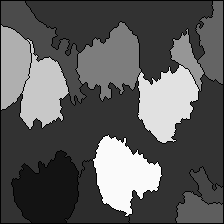

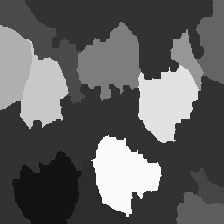

In [ ]:
# marker = markers+1
# marker = np.uint8(marker)
# cv2_imshow(marker*25)
# kernel = np.ones((5,5),np.uint8)
# morph = cv2.morphologyEx(marker, cv2.MORPH_CLOSE, kernel)
# cv2_imshow(morph*25)

In [ ]:
# cir1

[]

In [ ]:
# np.unique(markers)

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [ ]:
# import imutils

class_name = 'Polyp/'
p = '/content/EBHI-SEG/' + class_name
img_list = os.listdir(p+'image/')



# img_features = []
features_set0 = []

for img_ind in range(45, 60):

  img = cv2.imread(p+'image/'+img_list[img_ind])
  cv2_imshow(img)
  # analysis, out1 = op1(img)

  anno = cv2.imread(p+'label/'+img_list[img_ind])
  if not anno is None:
    cv2_imshow(anno)


  # img1 = img.copy()

  # out1 = cv2.pyrMeanShiftFiltering(img1, 40, 40, 3)
  # cv2_imshow(out1)


  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # gray = 255-gray
  cv2_imshow(gray)      # <---------------------------------
  # gray = cv2.equalizeHist(gray)
  # cv2_imshow(gray)


  # gray = cv2.GaussianBlur(gray, (7, 7), sigmaX=2)




  # sx, sy = sobel_filter(gray, 3)

  # sx = np.array(sx, np.uint8)
  # sy = np.array(sy, np.uint8)

  # min_x = np.min(sx)
  # sx = sx - min_x
  # max_x = np.max(sx)
  # sx = sx*255/max_x
  # sx = np.array(sx, np.uint8)
  # cv2_imshow(sx)

  # # print(np.unique(sx))
  # min_y = np.min(sy)
  # sy = sy - min_y
  # max_y = np.max(sy)
  # sy = sy*255/max_y
  # sy = np.array(sy, np.uint8)
  # cv2_imshow(sy)

  # grad = gradient_threshold(sx, sy)
  # cv2_imshow(grad)



  # _, thresh1 = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
  # cv2_imshow(thresh1)


  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
  morph1 = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
  # c_morph = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  cv2_imshow(morph1)      # <---------------------------------

  # new_img = gray.reshape((-1, 1))
  # new_img = np.float32(new_img)
  # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  # retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  # center1 = np.uint8(center1)
  # segmented_data1 = center1[labels1.flatten()]
  # final_img2 = segmented_data1.reshape((gray.shape))
  # cv2_imshow(final_img2)      # <---------------------------------


  # mean1 = cv2.pyrMeanShiftFiltering(c_morph, 40, 40, 3)

  # mean1 = morph1
  kernel1 = np.ones((5,5))*3
  kernel1[2, 2] = 1
  kernel1 = kernel1/75

  mean1 = cv2.filter2D(src=morph1, ddepth=-1, kernel=kernel1)
  cv2_imshow(mean1)     # <---------------------------------

  # morph1 = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  # mean1 = cv2.pyrMeanShiftFiltering(morph1, 60, 60, 3)
  # mean1 = cv2.cvtColor(mean1, cv2.COLOR_BGR2GRAY)
  # mean1 = cv2.medianBlur(morph1, 11)
  # cv2_imshow(mean1)

  # mean1 = morph1
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  cv2_imshow(final_img1)      # <---------------------------------


  # gray1 = cv2.cvtColor(final_img1, cv2.COLOR_BGR2GRAY)


  _, thresh1 = cv2.threshold(final_img1, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
  cv2_imshow(thresh1)     # <---------------------------------


  label_ids = thresh1

  dil = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  dil = np.array(dil, np.uint8)
  cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil

  dil = cv2.morphologyEx(label_ids, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  dil = np.array(dil, np.uint8)
  cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil


  # label_ids, org_labels, centroid, _ = eliminate_noise_opp(label_ids, min_lab=5000)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  # label_ids = np.array(label_ids, np.uint8)
  # label_ids_c = label_ids.copy()
  # cv2_imshow(label_ids_c)

  label_ids = fill_holes(label_ids)


  # label_ids = thresh1
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=4)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  cv2_imshow(label_ids_c)     # <---------------------------------

  # label_ids, org_labels, centroid, _ = eliminate_noise_opp(label_ids, min_lab=6000)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  # label_ids = np.array(label_ids, np.uint8)
  # label_ids_c = label_ids.copy()
  # cv2_imshow(label_ids_c)



  # label_ids = fill_holes(label_ids)
  # cv2_imshow(label_ids)     # <---------------------------------

  # print()

  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # cv2_imshow(dil)

  # label_ids = fill_holes(label_ids)


  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph

  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph

  # label_ids = fill_holes(label_ids)

  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph


  # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # box_arr = []

  # # Get the minimum area rectangle for each contour
  # for contour in contours:
  #   # Get the minimum area rectangle
  #   min_area_rect = cv2.minAreaRect(contour)
  #   box = []

  #   if min_area_rect[1][0] > min_area_rect[1][1]:
  #     box = [min_area_rect[1][0], min_area_rect[1][1], min_area_rect[2]]    # Length, Width, angle

  #   else:
  #     box = [min_area_rect[1][1], min_area_rect[1][0], min_area_rect[2]]

  #   box_arr.append(box)
  #   # box = cv2.boxPoints(min_area_rect)
  #   # box = np.int0(box)

  # box_arr = np.array(box_arr)

  # l_avg = np.sort(box_arr[:, 1])



  # Circularity ----------------------------------------------------------------------------------------------------------------------------------------------

  contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  # contours = imutils.grab_contours(contours)
  # mask = np.zeros_like(gray)
  # mask = np.ones(label_ids.shape, dtype="uint8") * 255
  selected_contours = []
  new_image = np.zeros(label_ids.shape, np.uint8)

  # cir_list = []
  for contour in contours:
    # print(1)
    try:
      cir = circularity(contour)
      # cir_list.append(cir)

    # cir_list_new = cir_list.copy()
    # cir_list_new.sort()
    # top_5_avg = cir_list_new[-5:]
      # print(cir)

    # for i in range(len(contours)):
      # try:

      if class_name=='Normal/':
        cir_thresh = 0.25

      elif class_name=='Polyp/':
        cir_thresh = 0.15

      if cir > cir_thresh:

        selected_contours.append(contour)
        new_image = np.zeros(label_ids.shape, np.uint8)
        cv2.fillPoly(new_image, pts=selected_contours, color= (255,255,255))
          # cv2.drawContours(mask, contour, -1, (255), thickness=cv2.FILLED)
          # cv2.drawContours(mask, [contour], -1, 0, -1)
          # mask = 255 - mask
          # result_image = cv2.bitwise_and(label_ids, mask)

    except:
      pass
    #   if cir_list[i] > 0.3:

    #     selected_contours.append(contours[i])
    #     new_image = np.zeros(label_ids.shape, np.uint8)
    #     cv2.fillPoly(new_image, pts=selected_contours, color= (255,255,255))

  cv2_imshow(new_image)       # <---------------------------------
  label_ids = new_image

  # Circularity END ----------------------------------------------------------------------------------------------------------------------------------------------


  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # dil = np.array(dil, np.uint8)
  # # cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil




  ## Fit Ellipse

  # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  # ellipse_image = img.copy()

  # for contour in contours:
  #   ellipse = cv2.fitEllipse(contour)
  #   cv2.ellipse(ellipse_image, ellipse, (0, 0, 255), 2)

  # cv2_imshow(ellipse_image)
  # print()


  # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  # analysis = cv2.connectedComponentsWithStats(label_ids, 4, cv2.CV_32S)
  # (totalLabels, label_ids__, values, centroid) = analysis
  # label_ids__ = np.array(label_ids__, np.uint16)


  morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  label_ids = np.array(morph, np.uint8)
  cv2_imshow(label_ids)


  # Get the minimum distance between all pairs of contours in the cleaned thresholded image
  # dist = get_min_dist_all_contours(label_ids__, centroid, totalLabels)
  # dist = np.array(dist)

  # After getting the min distance between all pair of contours, we use this distance to perform two tasks: Joining close contours and introducing necessary seed points.
  # label_ids = min_dist_operation(dist, label_ids)

  inverted = 255-label_ids
  erode = cv2.morphologyEx(inverted, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (31, 31)))
  # cv2_imshow(erode)     # <---------------------------------
  erode, org_labels, centroid, _ = eliminate_noise(erode)
  erode = np.array(erode, np.uint8)

  label_copy = label_ids + erode

  cv2_imshow(label_copy)

  # np.where()

  ret, analysis = cv2.connectedComponents(label_ids)
  analysis = np.where(analysis > 0, analysis+1, 0)
  analysis = np.where(erode > 0, analysis+1, analysis)

  # analysis = analysis+1

  # cv2_imshow(analysis)

  # cv2_imshow(analysis)

  # cv2_imshow(img)
  markers = watershed(img, analysis)
  # print(np.unique(markers))
  m = max(markers.reshape(-1))
  cv2_imshow(markers*255/m)


  ind_features = []

  num_pred = len(np.unique(markers)[2:])

  ind_features.append(num_pred)

  print()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# import imutils

p = '/content/EBHI-SEG/Polyp/'
img_list = os.listdir(p+'image/')

# img_features = []
features_set0 = []

for img_ind in range(45, 60):

  img = cv2.imread(p+'image/'+img_list[img_ind])
  cv2_imshow(img)
  # analysis, out1 = op1(img)

  anno = cv2.imread(p+'label/'+img_list[img_ind])
  if not anno is None:
    cv2_imshow(anno)


  # img1 = img.copy()

  # out1 = cv2.pyrMeanShiftFiltering(img1, 40, 40, 3)
  # cv2_imshow(out1)


  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = 255-gray
  cv2_imshow(gray)      # <---------------------------------
  # gray = cv2.equalizeHist(gray)
  # cv2_imshow(gray)


  # gray = cv2.GaussianBlur(gray, (7, 7), sigmaX=2)





  # _, thresh1 = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
  # cv2_imshow(thresh1)


  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
  morph1 = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
  c_morph = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  cv2_imshow(morph1)      # <---------------------------------

  # new_img = gray.reshape((-1, 1))
  # new_img = np.float32(new_img)
  # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  # retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  # center1 = np.uint8(center1)
  # segmented_data1 = center1[labels1.flatten()]
  # final_img2 = segmented_data1.reshape((gray.shape))
  # cv2_imshow(final_img2)      # <---------------------------------


  # mean1 = cv2.pyrMeanShiftFiltering(c_morph, 40, 40, 3)

  # mean1 = morph1
  kernel1 = np.ones((5,5))*3
  kernel1[2, 2] = 1
  kernel1 = kernel1/75

  mean1 = cv2.filter2D(src=morph1, ddepth=-1, kernel=kernel1)
  # cv2_imshow(mean1)     # <---------------------------------

  # morph1 = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  # mean1 = cv2.pyrMeanShiftFiltering(morph1, 60, 60, 3)
  # mean1 = cv2.cvtColor(mean1, cv2.COLOR_BGR2GRAY)
  # mean1 = cv2.medianBlur(morph1, 11)
  cv2_imshow(mean1)

  # mean1 = morph1
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  cv2_imshow(final_img1)      # <---------------------------------


  # gray1 = cv2.cvtColor(final_img1, cv2.COLOR_BGR2GRAY)


  _, thresh1 = cv2.threshold(final_img1, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
  cv2_imshow(thresh1)     # <---------------------------------


  label_ids = thresh1
  dil = cv2.morphologyEx(label_ids, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  dil = np.array(dil, np.uint8)
  cv2_imshow(dil)     # <---------------------------------
  label_ids = dil


  # label_ids, org_labels, centroid, _ = eliminate_noise_opp(label_ids, min_lab=5000)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  # label_ids = np.array(label_ids, np.uint8)
  # label_ids_c = label_ids.copy()
  # cv2_imshow(label_ids_c)


  # label_ids = thresh1
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=4)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  cv2_imshow(label_ids_c)     # <---------------------------------



  # label_ids = fill_holes(label_ids)
  # cv2_imshow(label_ids)     # <---------------------------------

  # print()

  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # cv2_imshow(dil)

  # label_ids = fill_holes(label_ids)


  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph

  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph

  label_ids = fill_holes(label_ids)

  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph


  # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # box_arr = []

  # # Get the minimum area rectangle for each contour
  # for contour in contours:
  #   # Get the minimum area rectangle
  #   min_area_rect = cv2.minAreaRect(contour)
  #   box = []

  #   if min_area_rect[1][0] > min_area_rect[1][1]:
  #     box = [min_area_rect[1][0], min_area_rect[1][1], min_area_rect[2]]    # Length, Width, angle

  #   else:
  #     box = [min_area_rect[1][1], min_area_rect[1][0], min_area_rect[2]]

  #   box_arr.append(box)
  #   # box = cv2.boxPoints(min_area_rect)
  #   # box = np.int0(box)

  # box_arr = np.array(box_arr)

  # l_avg = np.sort(box_arr[:, 1])



  # Circularity ----------------------------------------------------------------------------------------------------------------------------------------------

  # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  # # contours = imutils.grab_contours(contours)
  # # mask = np.zeros_like(gray)
  # # mask = np.ones(label_ids.shape, dtype="uint8") * 255
  # selected_contours = []
  # new_image = np.zeros(label_ids.shape, np.uint8)

  # # cir_list = []
  # for contour in contours:
  #   # print(1)
  #   cir = circularity(contour)
  #   # cir_list.append(cir)

  # # cir_list_new = cir_list.copy()
  # # cir_list_new.sort()
  # # top_5_avg = cir_list_new[-5:]
  #   # print(cir)

  # # for i in range(len(contours)):
  #   # try:
  #   if cir > 0.27:

  #     selected_contours.append(contour)
  #     new_image = np.zeros(label_ids.shape, np.uint8)
  #     cv2.fillPoly(new_image, pts=selected_contours, color= (255,255,255))
  #       # cv2.drawContours(mask, contour, -1, (255), thickness=cv2.FILLED)
  #       # cv2.drawContours(mask, [contour], -1, 0, -1)
  #       # mask = 255 - mask
  #       # result_image = cv2.bitwise_and(label_ids, mask)

  #   # except:
  #   #   if cir_list[i] > 0.3:

  #   #     selected_contours.append(contours[i])
  #   #     new_image = np.zeros(label_ids.shape, np.uint8)
  #   #     cv2.fillPoly(new_image, pts=selected_contours, color= (255,255,255))

  # cv2_imshow(new_image)       # <---------------------------------
  # label_ids = new_image

  # Circularity END ----------------------------------------------------------------------------------------------------------------------------------------------


  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # dil = np.array(dil, np.uint8)
  # # cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil




  ## Fit Ellipse

  # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  # ellipse_image = img.copy()

  # for contour in contours:
  #   ellipse = cv2.fitEllipse(contour)
  #   cv2.ellipse(ellipse_image, ellipse, (0, 0, 255), 2)

  # cv2_imshow(ellipse_image)
  # print()


  # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  analysis = cv2.connectedComponentsWithStats(label_ids, 4, cv2.CV_32S)
  (totalLabels, label_ids__, values, centroid) = analysis
  label_ids__ = np.array(label_ids__, np.uint16)


  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  # label_ids = np.array(morph, np.uint8)
  # cv2_imshow(label_ids)


  # Get the minimum distance between all pairs of contours in the cleaned thresholded image
  # dist = get_min_dist_all_contours(label_ids__, centroid, totalLabels)
  # dist = np.array(dist)

  # After getting the min distance between all pair of contours, we use this distance to perform two tasks: Joining close contours and introducing necessary seed points.
  # label_ids = min_dist_operation(dist, label_ids)

  inverted = 255-label_ids
  erode = cv2.morphologyEx(inverted, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21)))
  # cv2_imshow(erode)     # <---------------------------------
  erode, org_labels, centroid, _ = eliminate_noise(erode)
  erode = np.array(erode, np.uint8)

  label_copy = label_ids + erode

  cv2_imshow(label_copy)

  # np.where()

  ret, analysis = cv2.connectedComponents(label_ids)
  analysis = np.where(analysis > 0, analysis+1, 0)
  analysis = np.where(erode > 0, analysis+1, analysis)

  # analysis = analysis+1

  # cv2_imshow(analysis)

  # cv2_imshow(analysis)

  # cv2_imshow(img)
  markers = watershed(img, analysis)
  # print(np.unique(markers))
  m = max(markers.reshape(-1))
  cv2_imshow(markers*255/m)


  ind_features = []

  num_pred = len(np.unique(markers)[2:])

  ind_features.append(num_pred)

  print()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:

  # area_list_lumen = [0,0,0,0,0]
  # peri_list_lumen = [0,0,0,0,0]
  # cir_list_lumen = [0,0,0,0,0]

  # area_list_lumen_center = [0,0,0,0,0]
  # peri_list_lumen_center = [0,0,0,0,0]
  # cir_list_lumen_center = [0,0,0,0,0]

  # count=0


  # FEATURE EXTRACTION --------------------------------------------------------------------------------------------------------------------------------


  # for i in np.unique(markers)[2:]:
  #   updated = np.where(markers==i, 1, 0)

  #   # updated = cv2.merge([updated, updated, updated])
  #   updated = np.array(updated, np.uint8)

  #   contours, _ = cv2.findContours(updated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


  #   a = cv2.contourArea(contours[0])
  #   p = cv2.arcLength(contours[0], True)

  #   c = 4 * 3.14 * a / (p * p)

  #   area_list_lumen[count] = a
  #   peri_list_lumen[count] = p
  #   cir_list_lumen[count] = c


  #   # print()
  #   new_mask0 = cv2.bitwise_and(img[:, :, 0], img[:, :, 0], mask=updated)
  #   new_mask1 = cv2.bitwise_and(img[:, :, 1], img[:, :, 1], mask=updated)
  #   new_mask2 = cv2.bitwise_and(img[:, :, 2], img[:, :, 2], mask=updated)

  #   # new_mask = cv2.bitwise_and(gray, gray, mask=updated)

  #   new_mask = cv2.merge([new_mask0, new_mask1, new_mask2])
  #   cv2_imshow(new_mask)


  #   new_img = new_mask.reshape((-1, 1))
  #   new_img = np.float32(new_img)
  #   criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  #   retval1, labels1, center1 = cv2.kmeans(new_img, 3, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  #   center1 = np.uint8(center1)
  #   segmented_data1 = center1[labels1.flatten()]
  #   final_img1 = segmented_data1.reshape((new_mask.shape))
  #   cv2_imshow(final_img1)

  #   gray1 = cv2.cvtColor(final_img1, cv2.COLOR_BGR2GRAY)
  #   # gray = 255-gray
  #   cv2_imshow(gray1)

  #   _, thresh1 = cv2.threshold(gray1, 150, 255, cv2.THRESH_BINARY)
  #   cv2_imshow(thresh1)

  #   area = 0
  #   peri = 0

  #   contours, _ = cv2.findContours(updated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  #   for contour in contours:
  #     a = cv2.contourArea(contour)
  #     p = cv2.arcLength(contour, True)

  #     area += a
  #     peri += p

  #   cir = 4 * 3.14 * area / (peri * peri)

  #   area_list_lumen_center[count] = area
  #   peri_list_lumen_center[count] = peri
  #   cir_list_lumen_center[count] = cir
  #   count += 1

  #   if count >= 5:
  #     break


  # ind_features.extend(area_list_lumen)
  # ind_features.extend(peri_list_lumen)
  # ind_features.extend(cir_list_lumen)

  # ind_features.extend(area_list_lumen_center)
  # ind_features.extend(peri_list_lumen_center)
  # ind_features.extend(cir_list_lumen_center)

  # features_set0.append(ind_features)


  # FEATURE EXTRACTION END --------------------------------------------------------------------------------------------------------------------------------


  # new_m = np.where(markers==1, 255, 0)
  # cv2_imshow(new_m)
  # print()
  # final_img2 = cv2.cvtColor(final_img2, cv2.COLOR_GRAY2BGR)
  # watershed(final_img2, analysis)

### Low-grade IN

In [ ]:
# Pipeline 1

def pipeline_low(img):

  # Grayscale conversion
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # cv2_imshow(gray)

  # Grayscale morphology
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
  morph1 = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
  # cv2_imshow(morph1)

  # Smoothing
  kernel1 = np.ones((5,5))*3
  kernel1[2, 2] = 1
  kernel1 = kernel1/75

  mean1 = cv2.filter2D(src=morph1, ddepth=-1, kernel=kernel1)
  # cv2_imshow(mean1)

  # K-Means
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  # cv2_imshow(final_img1)

  # Thresholding
  _, thresh1 = cv2.threshold(final_img1, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
  # cv2_imshow(thresh1)


  label_ids = thresh1

  # Nosie Elimination
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=4)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  # cv2_imshow(label_ids_c)

  # Filling holes
  label_ids = fill_holes(label_ids)

  # Dilation
  morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  label_ids = np.array(morph, np.uint8)
  # cv2_imshow(label_ids)

  # Inversion
  inverted = 255-label_ids

  # Erosion
  erode = cv2.morphologyEx(inverted, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (41, 41)))
  # cv2_imshow(erode)

  # Noise Elimination
  erode, org_labels, centroid, _ = eliminate_noise(erode)
  erode = np.array(erode, np.uint8)

  #label_copy = label_ids + erode

  # cv2_imshow(label_copy)

  # Merging strategically, so that the entire background has the same pixel value
  ret, analysis = cv2.connectedComponents(label_ids)
  analysis = np.where(analysis > 0, analysis+1, 0)
  analysis = np.where(erode > 0, analysis+1, analysis)

  # Watershed
  markers = watershed(img, analysis)

  return markers

In [ ]:
# Pipeline 2

def pipeline_low_opp(img):

  # Grayscale conversion and inversion
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = 255-gray
  # cv2_imshow(gray)

  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
  morph1 = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
  # c_morph = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  # cv2_imshow(morph1)

  mean1 = morph1
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  # cv2_imshow(final_img1)

  _, thresh1 = cv2.threshold(final_img1, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
  # cv2_imshow(thresh1)


  label_ids = thresh1


  label_ids = fill_holes(label_ids)

  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=5)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  # cv2_imshow(label_ids_c)


  inverted = 255-label_ids
  erode = cv2.morphologyEx(inverted, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21)))
  # cv2_imshow(erode)
  erode, org_labels, centroid, _ = eliminate_noise(erode)
  erode = np.array(erode, np.uint8)

  label_copy = label_ids + erode

  # cv2_imshow(label_copy)

  # np.where()

  # Merging strategically, so that the entire background has the same pixel value
  ret, analysis = cv2.connectedComponents(label_ids)
  analysis = np.where(analysis > 0, analysis+1, 0)
  analysis = np.where(erode > 0, analysis+1, analysis)

  # Watershed
  markers = watershed(img, analysis)

  return markers

In [ ]:
# get the required output from the two pipeline using the circularity based selection algorithm

class_name = 'Low-grade IN/'
p = '/content/drive/MyDrive/EBHI-SEG/' + class_name
img_list = os.listdir(p+'image/')

# These two images don't have segmentation masks
img_list.remove('GTGT2012149-2-400-001.png')
img_list.remove('GT2012149-2-400-001.png')

count1 = 0
count2 = 0

pre_l = []
rec_l = []
jac_l = []
dice_l = []
acc_l = []

# img_features = []
features_set0 = []

for img_ind in range(0, 50):

  img = cv2.imread(p+'image/'+img_list[img_ind])
  cv2_imshow(img)
  # analysis, out1 = op1(img)

  anno = cv2.imread(p+'label/'+img_list[img_ind])
  anno = cv2.cvtColor(anno, cv2.COLOR_BGR2GRAY)
  # if not anno is None:
  cv2_imshow(anno)

  # getting the outputs from the two pipelines
  marker1 = pipeline_low(img)
  marker2 = pipeline_low_opp(img)

  # marker1 = cv2.cvtColor(marker1, cv2.COLOR_BGR2GRAY)
  m = max(marker1.reshape(-1))
  cv2_imshow(marker1*255/m)

  # marker2 = cv2.cvtColor(marker2, cv2.COLOR_BGR2GRAY)
  m = max(marker2.reshape(-1))
  cv2_imshow(marker2*255/m)

  cir1 = []
  cir2 = []

  # Getting the list of circularity values of all the objects segmented by pipeline 1

  for label in range(2, max(np.unique(marker1))+1):  # Skip background label 1
    component_mask = (marker1 == label).astype(np.uint8)
    contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = contours[0]  # Assuming only one contour per connected component
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, closed=True)
    cir = (4 * np.pi * area) / (perimeter ** 2)
    cir1.append(cir)

  # Getting the list of circularity values of all the objects segmented by pipeline 2

  for label in range(2, max(np.unique(marker2))+1):  # Skip background label 1
    component_mask = (marker2 == label).astype(np.uint8)
    contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = contours[0]  # Assuming only one contour per connected component
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, closed=True)
    cir = (4 * np.pi * area) / (perimeter ** 2)
    cir2.append(cir)

  # cir1.sort()
  # cir2.sort()

  # get the average circularity of the objects in the segmentation output by pipelines 1 and 2
  avg1 = sum(cir1)/len(cir1)
  avg2 = sum(cir2)/len(cir2)

  # Take segmentation by pipeline 1 as the output if its avg circularity is greater than that of pipeline 2; otherwise take the pipeline 2 output
  if avg1>avg2:
    marker = marker1
    count1 += 1

  else:
    marker = marker2
    count2 += 1


  # for displaying the output
  marker_binary = np.where(marker<=1, 0, 1)
  m = max(marker_binary.reshape(-1))
  # marker_binary = cv2.cvtColor(marker_binary, cv2.COLOR_BGR2GRAY)
  cv2_imshow(marker_binary*255/m)

  # calculate evaluation metrics
  pre, rec, jac, dice, acc = calculate_segmentation_metrics(marker_binary, anno)

  print()

  pre_l.append(pre)
  rec_l.append(rec)
  jac_l.append(jac)
  dice_l.append(dice)
  acc_l.append(acc)

avg_pre = sum(pre_l)/len(pre_l)
avg_rec = sum(rec_l)/len(rec_l)
avg_jac = sum(jac_l)/len(jac_l)
avg_dice = sum(dice_l)/len(dice_l)
avg_acc = sum(acc_l)/len(acc_l)

print('Average Precision:', avg_pre)
print('Average Recall:', avg_rec)
print('Average Jaccard:', avg_jac)
print('Average Dice:', avg_dice)
print('Accuracy:', avg_acc)


Output hidden; open in https://colab.research.google.com to view.

#### Others, including individual pipelines - NOT required

In [ ]:
class_name = 'Low-grade IN/'
p = '/content/EBHI-SEG/' + class_name
img_list = os.listdir(p+'image/')

for img_ind in range(len(img_list)):
  anno = cv2.imread(p+'label/'+img_list[img_ind])
  if anno is None:
    print(img_list[img_ind])

GTGT2012149-2-400-001.png
GT2012149-2-400-001.png


In [ ]:
# import imutils

class_name = 'Low-grade IN/'
p = '/content/EBHI-SEG/' + class_name
img_list = os.listdir(p+'image/')

# These two images don't have segmentation masks
img_list.remove('GTGT2012149-2-400-001.png')
img_list.remove('GT2012149-2-400-001.png')

# img_features = []
features_set0 = []

for img_ind in range(60, 75):

  img = cv2.imread(p+'image/'+img_list[img_ind])
  cv2_imshow(img)
  # analysis, out1 = op1(img)

  anno = cv2.imread(p+'label/'+img_list[img_ind])
  # if not anno is None:
  cv2_imshow(anno)


  # img1 = img.copy()

  # out1 = cv2.pyrMeanShiftFiltering(img1, 40, 40, 3)
  # cv2_imshow(out1)


  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # gray = 255-gray
  cv2_imshow(gray)      # <---------------------------------
  # gray = cv2.equalizeHist(gray)
  # cv2_imshow(gray)


  # gray = cv2.GaussianBlur(gray, (7, 7), sigmaX=2)




  # _, thresh1 = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
  # cv2_imshow(thresh1)


  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
  morph1 = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
  # c_morph = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  cv2_imshow(morph1)      # <---------------------------------

  # new_img = gray.reshape((-1, 1))
  # new_img = np.float32(new_img)
  # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  # retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  # center1 = np.uint8(center1)
  # segmented_data1 = center1[labels1.flatten()]
  # final_img2 = segmented_data1.reshape((gray.shape))
  # cv2_imshow(final_img2)      # <---------------------------------


  # mean1 = cv2.pyrMeanShiftFiltering(c_morph, 40, 40, 3)

  # mean1 = morph1
  kernel1 = np.ones((5,5))*3
  kernel1[2, 2] = 1
  kernel1 = kernel1/75

  mean1 = cv2.filter2D(src=morph1, ddepth=-1, kernel=kernel1)
  cv2_imshow(mean1)     # <---------------------------------

  # morph1 = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  # mean1 = cv2.pyrMeanShiftFiltering(morph1, 60, 60, 3)
  # mean1 = cv2.cvtColor(mean1, cv2.COLOR_BGR2GRAY)
  # mean1 = cv2.medianBlur(morph1, 11)
  # cv2_imshow(mean1)

  # mean1 = morph1
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  cv2_imshow(final_img1)      # <---------------------------------


  # gray1 = cv2.cvtColor(final_img1, cv2.COLOR_BGR2GRAY)


  _, thresh1 = cv2.threshold(final_img1, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
  cv2_imshow(thresh1)     # <---------------------------------


  label_ids = thresh1

  dil = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  dil = np.array(dil, np.uint8)
  cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil

  dil = cv2.morphologyEx(label_ids, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  dil = np.array(dil, np.uint8)
  cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil


  # label_ids, org_labels, centroid, _ = eliminate_noise_opp(label_ids, min_lab=5000)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  # label_ids = np.array(label_ids, np.uint8)
  # label_ids_c = label_ids.copy()
  # cv2_imshow(label_ids_c)

  # label_ids = fill_holes(label_ids)


  # label_ids = thresh1
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=4)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  cv2_imshow(label_ids_c)     # <---------------------------------

  # label_ids, org_labels, centroid, _ = eliminate_noise_opp(label_ids, min_lab=6000)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  # label_ids = np.array(label_ids, np.uint8)
  # label_ids_c = label_ids.copy()
  # cv2_imshow(label_ids_c)



  # label_ids = fill_holes(label_ids)
  # cv2_imshow(label_ids)     # <---------------------------------

  # print()

  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # cv2_imshow(dil)

  # label_ids = fill_holes(label_ids)


  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph

  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph

  label_ids = fill_holes(label_ids)

  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph


  # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # box_arr = []

  # # Get the minimum area rectangle for each contour
  # for contour in contours:
  #   # Get the minimum area rectangle
  #   min_area_rect = cv2.minAreaRect(contour)
  #   box = []

  #   if min_area_rect[1][0] > min_area_rect[1][1]:
  #     box = [min_area_rect[1][0], min_area_rect[1][1], min_area_rect[2]]    # Length, Width, angle

  #   else:
  #     box = [min_area_rect[1][1], min_area_rect[1][0], min_area_rect[2]]

  #   box_arr.append(box)
  #   # box = cv2.boxPoints(min_area_rect)
  #   # box = np.int0(box)

  # box_arr = np.array(box_arr)

  # l_avg = np.sort(box_arr[:, 1])



  # Circularity ----------------------------------------------------------------------------------------------------------------------------------------------

  contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  # contours = imutils.grab_contours(contours)
  # mask = np.zeros_like(gray)
  # mask = np.ones(label_ids.shape, dtype="uint8") * 255
  selected_contours = []
  new_image = np.zeros(label_ids.shape, np.uint8)

  # cir_list = []
  for contour in contours:
    # print(1)
    try:
      cir = circularity(contour)
      # cir_list.append(cir)

    # cir_list_new = cir_list.copy()
    # cir_list_new.sort()
    # top_5_avg = cir_list_new[-5:]
      # print(cir)

    # for i in range(len(contours)):
      # try:

      # if class_name=='Normal/':
      #   cir_thresh = 0.25

      # elif class_name=='Polyp/':
      #   cir_thresh = 0.15

      if cir > 0:

        selected_contours.append(contour)
        new_image = np.zeros(label_ids.shape, np.uint8)
        cv2.fillPoly(new_image, pts=selected_contours, color= (255,255,255))
          # cv2.drawContours(mask, contour, -1, (255), thickness=cv2.FILLED)
          # cv2.drawContours(mask, [contour], -1, 0, -1)
          # mask = 255 - mask
          # result_image = cv2.bitwise_and(label_ids, mask)

    except:
      pass
    #   if cir_list[i] > 0.3:

    #     selected_contours.append(contours[i])
    #     new_image = np.zeros(label_ids.shape, np.uint8)
    #     cv2.fillPoly(new_image, pts=selected_contours, color= (255,255,255))

  cv2_imshow(new_image)       # <---------------------------------
  label_ids = new_image

  # Circularity END ----------------------------------------------------------------------------------------------------------------------------------------------


  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # dil = np.array(dil, np.uint8)
  # # cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil



  # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  # analysis = cv2.connectedComponentsWithStats(label_ids, 4, cv2.CV_32S)
  # (totalLabels, label_ids__, values, centroid) = analysis
  # label_ids__ = np.array(label_ids__, np.uint16)


  morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  label_ids = np.array(morph, np.uint8)
  cv2_imshow(label_ids)


  # Get the minimum distance between all pairs of contours in the cleaned thresholded image
  # dist = get_min_dist_all_contours(label_ids__, centroid, totalLabels)
  # dist = np.array(dist)

  # After getting the min distance between all pair of contours, we use this distance to perform two tasks: Joining close contours and introducing necessary seed points.
  # label_ids = min_dist_operation(dist, label_ids)

  inverted = 255-label_ids
  erode = cv2.morphologyEx(inverted, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (41, 41)))
  # cv2_imshow(erode)     # <---------------------------------
  erode, org_labels, centroid, _ = eliminate_noise(erode)
  erode = np.array(erode, np.uint8)

  label_copy = label_ids + erode

  cv2_imshow(label_copy)

  # np.where()

  ret, analysis = cv2.connectedComponents(label_ids)
  analysis = np.where(analysis > 0, analysis+1, 0)
  analysis = np.where(erode > 0, analysis+1, analysis)

  # analysis = analysis+1

  # cv2_imshow(analysis)

  # cv2_imshow(analysis)

  # cv2_imshow(img)

  # img = cv2.GaussianBlur(img, (7, 7), sigmaX=2)
  # gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
  markers = watershed(img, analysis)
  # print(np.unique(markers))
  m = max(markers.reshape(-1))
  cv2_imshow(markers*255/m)


  # gray1 = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
  # markers = watershed(gray1, analysis)
  # # print(np.unique(markers))
  # m = max(markers.reshape(-1))
  # cv2_imshow(markers*255/m)


  # gray2 = 255-gray
  # gray2 = cv2.cvtColor(gray2, cv2.COLOR_GRAY2BGR)
  # markers = watershed(gray2, analysis)
  # # print(np.unique(markers))
  # m = max(markers.reshape(-1))
  # cv2_imshow(markers*255/m)


  ind_features = []

  num_pred = len(np.unique(markers)[2:])

  ind_features.append(num_pred)

  print()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# import imutils

p = '/content/EBHI-SEG/Low-grade IN/'
img_list = os.listdir(p+'image/')

# These two images don't have segmentation masks
img_list.remove('GTGT2012149-2-400-001.png')
img_list.remove('GT2012149-2-400-001.png')

# img_features = []
features_set0 = []

for img_ind in range(60, 75):

  img = cv2.imread(p+'image/'+img_list[img_ind])
  cv2_imshow(img)

  # cv2_imshow(img[:, :, 0])
  # cv2_imshow(img[:, :, 1])
  # cv2_imshow(img[:, :, 2])
  # analysis, out1 = op1(img)

  anno = cv2.imread(p+'label/'+img_list[img_ind])
  # if not anno is None:
  cv2_imshow(anno)


  # img1 = img.copy()

  # out1 = cv2.pyrMeanShiftFiltering(img1, 40, 40, 3)
  # cv2_imshow(out1)


  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # gray = img[:, :, 2]
  gray = 255-gray
  cv2_imshow(gray)      # <---------------------------------
  # gray = cv2.equalizeHist(gray)
  # cv2_imshow(gray)


  # gray = cv2.GaussianBlur(gray, (7, 7), sigmaX=2)



  # _, thresh1 = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
  # cv2_imshow(thresh1)


  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
  morph1 = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
  # c_morph = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  cv2_imshow(morph1)      # <---------------------------------

  # new_img = gray.reshape((-1, 1))
  # new_img = np.float32(new_img)
  # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  # retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  # center1 = np.uint8(center1)
  # segmented_data1 = center1[labels1.flatten()]
  # final_img2 = segmented_data1.reshape((gray.shape))
  # cv2_imshow(final_img2)      # <---------------------------------


  # c_morph = img
  # mean1 = cv2.pyrMeanShiftFiltering(c_morph, 40, 40, 3)
  # cv2_imshow(mean1)

  # mean1 = morph1
  # kernel1 = np.ones((5,5))*3
  # kernel1[2, 2] = 1
  # kernel1 = kernel1/75

  # mean1 = cv2.filter2D(src=morph1, ddepth=-1, kernel=kernel1)
  # cv2_imshow(mean1)     # <---------------------------------

  # morph1 = img
  # morph1 = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  # mean1 = cv2.pyrMeanShiftFiltering(morph1, 40, 40, 3)
  # mean1 = cv2.cvtColor(mean1, cv2.COLOR_BGR2GRAY)
  # mean1 = cv2.medianBlur(morph1, 11)
  # cv2_imshow(mean1)

  mean1 = morph1
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  cv2_imshow(final_img1)      # <---------------------------------


  # gray1 = cv2.cvtColor(final_img1, cv2.COLOR_BGR2GRAY)


  _, thresh1 = cv2.threshold(final_img1, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
  cv2_imshow(thresh1)     # <---------------------------------


  label_ids = thresh1
  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  # dil = np.array(dil, np.uint8)
  # cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil


  # label_ids = thresh1
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=9)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  cv2_imshow(label_ids_c)     # <---------------------------------



  label_ids = fill_holes(label_ids)

  morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  morph = np.array(morph, np.uint8)
  cv2_imshow(morph)     # <---------------------------------
  label_ids = morph


  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # dil = np.array(dil, np.uint8)
  # # cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil

  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=5)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  cv2_imshow(label_ids_c)


  # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  # analysis = cv2.connectedComponentsWithStats(label_ids, 4, cv2.CV_32S)
  # (totalLabels, label_ids__, values, centroid) = analysis
  # label_ids__ = np.array(label_ids__, np.uint16)


  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
  # label_ids = np.array(morph, np.uint8)
  # cv2_imshow(label_ids)


  # Get the minimum distance between all pairs of contours in the cleaned thresholded image
  # dist = get_min_dist_all_contours(label_ids__, centroid, totalLabels)
  # dist = np.array(dist)

  # After getting the min distance between all pair of contours, we use this distance to perform two tasks: Joining close contours and introducing necessary seed points.
  # label_ids = min_dist_operation(dist, label_ids)

  inverted = 255-label_ids
  erode = cv2.morphologyEx(inverted, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21)))
  # cv2_imshow(erode)     # <---------------------------------
  erode, org_labels, centroid, _ = eliminate_noise(erode)
  erode = np.array(erode, np.uint8)

  label_copy = label_ids + erode

  cv2_imshow(label_copy)

  # np.where()

  ret, analysis = cv2.connectedComponents(label_ids)
  analysis = np.where(analysis > 0, analysis+1, 0)
  analysis = np.where(erode > 0, analysis+1, analysis)

  # analysis = analysis+1

  # cv2_imshow(analysis)

  # cv2_imshow(analysis)

  # cv2_imshow(img)
  markers = watershed(img, analysis)
  # print(np.unique(markers))
  m = max(markers.reshape(-1))
  cv2_imshow(markers*255/m)

  print()

Output hidden; open in https://colab.research.google.com to view.

### Serrated adenoma (Same as Low-grade IN)

In [ ]:
# Pipeline 1

def pipeline_ser(img):

  # Grayscale conversion
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # cv2_imshow(gray)

  # Grayscale morphology
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
  morph1 = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
  # cv2_imshow(morph1)

  # Smoothing
  kernel1 = np.ones((5,5))*3
  kernel1[2, 2] = 1
  kernel1 = kernel1/75

  mean1 = cv2.filter2D(src=morph1, ddepth=-1, kernel=kernel1)

  # cv2_imshow(mean1)

  # K-Means
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  # cv2_imshow(final_img1)


  # Thresholding
  _, thresh1 = cv2.threshold(final_img1, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
  # cv2_imshow(thresh1)


  label_ids = thresh1


  # Eliminate Noise
  # label_ids = thresh1
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=4)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  # cv2_imshow(label_ids_c)


  # Filling holes
  label_ids = fill_holes(label_ids)

  # Dilation
  morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
  label_ids = np.array(morph, np.uint8)
  # cv2_imshow(label_ids)

  # Inversion
  inverted = 255-label_ids

  # Erosion
  erode = cv2.morphologyEx(inverted, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21)))
  # cv2_imshow(erode)     # <---------------------------------

  # Eliminate Noise
  erode, org_labels, centroid, _ = eliminate_noise(erode)
  erode = np.array(erode, np.uint8)

  # label_copy = label_ids + erode

  # cv2_imshow(label_copy)

  # np.where()

  # Merging strategically, so that the entire background has the same pixel value
  ret, analysis = cv2.connectedComponents(label_ids)
  analysis = np.where(analysis > 0, analysis+1, 0)
  analysis = np.where(erode > 0, analysis+1, analysis)

  # Watershed
  markers = watershed(img, analysis)

  return markers


In [ ]:
# Pipeline 2

def pipeline_ser_opp(img):

  # Grayscale conversion and invesion
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = 255-gray
  # cv2_imshow(gray)

  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
  morph1 = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
  # cv2_imshow(morph1)

  # K-Means
  mean1 = morph1
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  # cv2_imshow(final_img1)

  # Thresholding
  _, thresh1 = cv2.threshold(final_img1, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
  # cv2_imshow(thresh1)

  label_ids = thresh1

  # Filling holes
  label_ids = fill_holes(label_ids)

  # Eliminate Noise
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=5)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  # cv2_imshow(label_ids_c)

  # Inversion
  inverted = 255-label_ids

  # Erosion
  erode = cv2.morphologyEx(inverted, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21)))
  # cv2_imshow(erode)

  # Noise Elimination
  erode, org_labels, centroid, _ = eliminate_noise(erode)
  erode = np.array(erode, np.uint8)

  # label_copy = label_ids + erode

  # Merging strategically, so that the entire background has the same pixel value
  ret, analysis = cv2.connectedComponents(label_ids)
  analysis = np.where(analysis > 0, analysis+1, 0)
  analysis = np.where(erode > 0, analysis+1, analysis)

  # Watershed
  markers = watershed(img, analysis)

  return markers


In [ ]:
# get the required output from the two pipeline using the circularity based selection algorithm

class_name = 'Serrated adenoma/'
p = '/content/drive/MyDrive/EBHI-SEG/' + class_name
img_list = os.listdir(p+'image/')

count1 = 0
count2 = 0

pre_l = []
rec_l = []
jac_l = []
dice_l = []
acc_l = []

# img_features = []
features_set0 = []

for img_ind in range(0, 50):

  img = cv2.imread(p+'image/'+img_list[img_ind])
  cv2_imshow(img)
  # analysis, out1 = op1(img)

  anno = cv2.imread(p+'label/'+img_list[img_ind])
  anno = cv2.cvtColor(anno, cv2.COLOR_BGR2GRAY)
  # if not anno is None:
  cv2_imshow(anno)

  # getting the outputs from both the pipelines
  marker1 = pipeline_ser(img)
  marker2 = pipeline_ser_opp(img)

  # marker1 = cv2.cvtColor(marker1, cv2.COLOR_BGR2GRAY)
  m = max(marker1.reshape(-1))
  cv2_imshow(marker1*255/m)

  # marker2 = cv2.cvtColor(marker2, cv2.COLOR_BGR2GRAY)
  m = max(marker2.reshape(-1))
  cv2_imshow(marker2*255/m)

  cir1 = []
  cir2 = []

  # Getting the list of circularity values of all the objects segmented by pipeline 1

  for label in range(2, max(np.unique(marker1))+1):  # Skip background label 1
    component_mask = (marker1 == label).astype(np.uint8)
    contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = contours[0]  # Assuming only one contour per connected component

    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, closed=True)
    cir = (4 * np.pi * area) / (perimeter ** 2)
    cir1.append(cir)

  # Getting the list of circularity values of all the objects segmented by pipeline 2

  for label in range(2, max(np.unique(marker2))+1):  # Skip background label 1
    component_mask = (marker2 == label).astype(np.uint8)
    contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = contours[0]  # Assuming only one contour per connected component

    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, closed=True)
    cir = (4 * np.pi * area) / (perimeter ** 2)
    cir2.append(cir)

  # cir1.sort()
  # cir2.sort()

  # get the average circularity of the objects in the segmentation output by pipelines 1 and 2
  avg1 = sum(cir1)/len(cir1)
  avg2 = sum(cir2)/len(cir2)

  # Take segmentation by pipeline 1 as the output if its avg circularity is greater than that of pipeline 2; otherwise take the pipeline 2 output
  if avg1>avg2:
    marker = marker1
    count1 += 1

  else:
    marker = marker2
    count2 += 1


  # for displaying the output
  marker_binary = np.where(marker<=1, 0, 1)
  m = max(marker_binary.reshape(-1))
  # marker_binary = cv2.cvtColor(marker_binary, cv2.COLOR_BGR2GRAY)
  cv2_imshow(marker_binary*255/m)

  # calculating evaluation metrics
  pre, rec, jac, dice, acc = calculate_segmentation_metrics(marker_binary, anno)

  print()

  pre_l.append(pre)
  rec_l.append(rec)
  jac_l.append(jac)
  dice_l.append(dice)
  acc_l.append(acc)

avg_pre = sum(pre_l)/len(pre_l)
avg_rec = sum(rec_l)/len(rec_l)
avg_jac = sum(jac_l)/len(jac_l)
avg_dice = sum(dice_l)/len(dice_l)
avg_acc = sum(acc_l)/len(acc_l)

print('Average Precision:', avg_pre)
print('Average Recall:', avg_rec)
print('Average Jaccard', avg_jac)
print('Average Dice', avg_dice)
print('Accuracy', avg_acc)


Output hidden; open in https://colab.research.google.com to view.

#### Others, including individual pipelines - NOT required

In [ ]:
# import imutils

p = '/content/EBHI-SEG/Serrated adenoma/'
img_list = os.listdir(p+'image/')

# img_features = []
features_set0 = []

for img_ind in range(15, 30):

  img = cv2.imread(p+'image/'+img_list[img_ind])
  cv2_imshow(img)
  # analysis, out1 = op1(img)

  anno = cv2.imread(p+'label/'+img_list[img_ind])
  if not anno is None:
    cv2_imshow(anno)


  # img1 = img.copy()

  # out1 = cv2.pyrMeanShiftFiltering(img1, 40, 40, 3)
  # cv2_imshow(out1)


  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # gray = 255-gray
  cv2_imshow(gray)      # <---------------------------------
  # gray = cv2.equalizeHist(gray)
  # cv2_imshow(gray)


  # gray = cv2.GaussianBlur(gray, (7, 7), sigmaX=2)



  # _, thresh1 = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
  # cv2_imshow(thresh1)


  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
  morph1 = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
  c_morph = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  cv2_imshow(morph1)      # <---------------------------------

  # new_img = gray.reshape((-1, 1))
  # new_img = np.float32(new_img)
  # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  # retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  # center1 = np.uint8(center1)
  # segmented_data1 = center1[labels1.flatten()]
  # final_img2 = segmented_data1.reshape((gray.shape))
  # cv2_imshow(final_img2)      # <---------------------------------


  # mean1 = cv2.pyrMeanShiftFiltering(c_morph, 40, 40, 3)

  # mean1 = morph1
  kernel1 = np.ones((5,5))*3
  kernel1[2, 2] = 1
  kernel1 = kernel1/75

  mean1 = cv2.filter2D(src=morph1, ddepth=-1, kernel=kernel1)
  # cv2_imshow(mean1)     # <---------------------------------

  # morph1 = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  # mean1 = cv2.pyrMeanShiftFiltering(morph1, 60, 60, 3)
  # mean1 = cv2.cvtColor(mean1, cv2.COLOR_BGR2GRAY)
  # mean1 = cv2.medianBlur(morph1, 11)
  cv2_imshow(mean1)

  # mean1 = morph1
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  cv2_imshow(final_img1)      # <---------------------------------


  # gray1 = cv2.cvtColor(final_img1, cv2.COLOR_BGR2GRAY)


  _, thresh1 = cv2.threshold(final_img1, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
  cv2_imshow(thresh1)     # <---------------------------------


  label_ids = thresh1
  dil = cv2.morphologyEx(label_ids, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  dil = np.array(dil, np.uint8)
  cv2_imshow(dil)     # <---------------------------------
  label_ids = dil


  # label_ids = thresh1
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=4)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  cv2_imshow(label_ids_c)     # <---------------------------------



  label_ids = fill_holes(label_ids)

  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph


  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # dil = np.array(dil, np.uint8)
  # # cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil




  # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  analysis = cv2.connectedComponentsWithStats(label_ids, 4, cv2.CV_32S)
  (totalLabels, label_ids__, values, centroid) = analysis
  label_ids__ = np.array(label_ids__, np.uint16)


  morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
  label_ids = np.array(morph, np.uint8)
  cv2_imshow(label_ids)


  # Get the minimum distance between all pairs of contours in the cleaned thresholded image
  # dist = get_min_dist_all_contours(label_ids__, centroid, totalLabels)
  # dist = np.array(dist)

  # After getting the min distance between all pair of contours, we use this distance to perform two tasks: Joining close contours and introducing necessary seed points.
  # label_ids = min_dist_operation(dist, label_ids)

  inverted = 255-label_ids
  erode = cv2.morphologyEx(inverted, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21)))
  # cv2_imshow(erode)     # <---------------------------------
  erode, org_labels, centroid, _ = eliminate_noise(erode)
  erode = np.array(erode, np.uint8)

  label_copy = label_ids + erode

  cv2_imshow(label_copy)

  # np.where()

  ret, analysis = cv2.connectedComponents(label_ids)
  analysis = np.where(analysis > 0, analysis+1, 0)
  analysis = np.where(erode > 0, analysis+1, analysis)

  # analysis = analysis+1

  # cv2_imshow(analysis)

  # cv2_imshow(analysis)

  # cv2_imshow(img)
  markers = watershed(img, analysis)
  # print(np.unique(markers))
  m = max(markers.reshape(-1))
  cv2_imshow(markers*255/m)

  print()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# import imutils

p = '/content/EBHI-SEG/Serrated adenoma/'
img_list = os.listdir(p+'image/')

# img_features = []
features_set0 = []

for img_ind in range(15, 30):

  img = cv2.imread(p+'image/'+img_list[img_ind])
  cv2_imshow(img)

  # cv2_imshow(img[:, :, 0])
  # cv2_imshow(img[:, :, 1])
  # cv2_imshow(img[:, :, 2])
  # analysis, out1 = op1(img)

  anno = cv2.imread(p+'label/'+img_list[img_ind])
  if not anno is None:
    cv2_imshow(anno)


  # img1 = img.copy()

  # out1 = cv2.pyrMeanShiftFiltering(img1, 40, 40, 3)
  # cv2_imshow(out1)


  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # gray = img[:, :, 2]
  gray = 255-gray
  cv2_imshow(gray)      # <---------------------------------
  # gray = cv2.equalizeHist(gray)
  # cv2_imshow(gray)


  # gray = cv2.GaussianBlur(gray, (7, 7), sigmaX=2)



  # _, thresh1 = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
  # cv2_imshow(thresh1)


  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
  morph1 = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
  # c_morph = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  cv2_imshow(morph1)      # <---------------------------------

  # new_img = gray.reshape((-1, 1))
  # new_img = np.float32(new_img)
  # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  # retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  # center1 = np.uint8(center1)
  # segmented_data1 = center1[labels1.flatten()]
  # final_img2 = segmented_data1.reshape((gray.shape))
  # cv2_imshow(final_img2)      # <---------------------------------


  # c_morph = img
  # mean1 = cv2.pyrMeanShiftFiltering(c_morph, 40, 40, 3)
  # cv2_imshow(mean1)

  # mean1 = morph1
  # kernel1 = np.ones((5,5))*3
  # kernel1[2, 2] = 1
  # kernel1 = kernel1/75

  # mean1 = cv2.filter2D(src=morph1, ddepth=-1, kernel=kernel1)
  # cv2_imshow(mean1)     # <---------------------------------

  # morph1 = img
  # morph1 = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  # mean1 = cv2.pyrMeanShiftFiltering(morph1, 40, 40, 3)
  # mean1 = cv2.cvtColor(mean1, cv2.COLOR_BGR2GRAY)
  # mean1 = cv2.medianBlur(morph1, 11)
  # cv2_imshow(mean1)

  mean1 = morph1
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  cv2_imshow(final_img1)      # <---------------------------------


  # gray1 = cv2.cvtColor(final_img1, cv2.COLOR_BGR2GRAY)


  _, thresh1 = cv2.threshold(final_img1, 110, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
  cv2_imshow(thresh1)     # <---------------------------------


  label_ids = thresh1
  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  # dil = np.array(dil, np.uint8)
  # cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil


  # label_ids = thresh1
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=9)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  cv2_imshow(label_ids_c)     # <---------------------------------



  label_ids = fill_holes(label_ids)

  morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  morph = np.array(morph, np.uint8)
  cv2_imshow(morph)     # <---------------------------------
  label_ids = morph


  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # dil = np.array(dil, np.uint8)
  # # cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil

  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=5)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  cv2_imshow(label_ids_c)


  # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  # analysis = cv2.connectedComponentsWithStats(label_ids, 4, cv2.CV_32S)
  # (totalLabels, label_ids__, values, centroid) = analysis
  # label_ids__ = np.array(label_ids__, np.uint16)


  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
  # label_ids = np.array(morph, np.uint8)
  # cv2_imshow(label_ids)


  # Get the minimum distance between all pairs of contours in the cleaned thresholded image
  # dist = get_min_dist_all_contours(label_ids__, centroid, totalLabels)
  # dist = np.array(dist)

  # After getting the min distance between all pair of contours, we use this distance to perform two tasks: Joining close contours and introducing necessary seed points.
  # label_ids = min_dist_operation(dist, label_ids)

  inverted = 255-label_ids
  erode = cv2.morphologyEx(inverted, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (21, 21)))
  # cv2_imshow(erode)     # <---------------------------------
  erode, org_labels, centroid, _ = eliminate_noise(erode)
  erode = np.array(erode, np.uint8)

  label_copy = label_ids + erode

  cv2_imshow(label_copy)

  # np.where()

  ret, analysis = cv2.connectedComponents(label_ids)
  analysis = np.where(analysis > 0, analysis+1, 0)
  analysis = np.where(erode > 0, analysis+1, analysis)

  # analysis = analysis+1

  # cv2_imshow(analysis)

  # cv2_imshow(analysis)

  # cv2_imshow(img)
  markers = watershed(img, analysis)
  # print(np.unique(markers))
  m = max(markers.reshape(-1))
  cv2_imshow(markers*255/m)

  print()

Output hidden; open in https://colab.research.google.com to view.

### High-grade IN

In [ ]:
# Pipeline for segmentation

def pipeline_high(img):

  # grayscale conversion and inversion
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = 255-gray
  # cv2_imshow(gray)

  # No morphology or smoothing
  morph1 = gray
  mean1 = morph1

  # K-Means
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  # cv2_imshow(final_img1)

  # Thresholding
  _, thresh1 = cv2.threshold(final_img1, 140, 255, cv2.THRESH_BINARY)
  # cv2_imshow(thresh1)


  label_ids = thresh1

  # Filling holes
  label_ids = fill_holes(label_ids)
  # cv2_imshow(label_ids)


  # Eliminate Noise
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  # cv2_imshow(label_ids)

  # Dilation
  morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  label_ids = np.array(morph, np.uint8)
  # cv2_imshow(label_ids)

  return label_ids


In [ ]:
# Display the output from the proposed pipeline

class_name = 'High-grade IN/'
p = '/content/drive/MyDrive/EBHI-SEG/' + class_name
img_list = os.listdir(p+'image/')

count1 = 0
count2 = 0

pre_l = []
rec_l = []
jac_l = []
dice_l = []
acc_l = []

# img_features = []
features_set0 = []

for img_ind in range(0, 50):

  img = cv2.imread(p+'image/'+img_list[img_ind])
  cv2_imshow(img)
  # analysis, out1 = op1(img)

  anno = cv2.imread(p+'label/'+img_list[img_ind])
  anno = cv2.cvtColor(anno, cv2.COLOR_BGR2GRAY)
  # if not anno is None:
  cv2_imshow(anno)

  marker = pipeline_high(img)
  # m = max(marker.reshape(-1))
  # cv2_imshow(marker*255/m)

  marker_binary = np.where(marker<=1, 0, 1)
  # marker_binary = cv2.cvtColor(marker_binary, cv2.COLOR_BGR2GRAY)
  m = max(marker_binary.reshape(-1))
  cv2_imshow(marker_binary*255/m)

  # Calculate evaluation metrics
  pre, rec, jac, dice, acc = calculate_segmentation_metrics(marker_binary, anno)

  print()

  pre_l.append(pre)
  rec_l.append(rec)
  jac_l.append(jac)
  dice_l.append(dice)
  acc_l.append(acc)

avg_pre = sum(pre_l)/len(pre_l)
avg_rec = sum(rec_l)/len(rec_l)
avg_jac = sum(jac_l)/len(jac_l)
avg_dice = sum(dice_l)/len(dice_l)
avg_acc = sum(acc_l)/len(acc_l)

print('Average Precision:', avg_pre)
print('Average Recall:', avg_rec)
print('Average Jaccard:', avg_jac)
print('Average Dice:', avg_dice)
print('Accuracy:', avg_acc)


Output hidden; open in https://colab.research.google.com to view.

#### Others - NOT required

In [ ]:
# import imutils

p = '/content/EBHI-SEG/High-grade IN/'
img_list = os.listdir(p+'image/')

# img_features = []
features_set0 = []

for img_ind in range(15):

  img = cv2.imread(p+'image/'+img_list[img_ind])
  cv2_imshow(img)
  # analysis, out1 = op1(img)

  # anno = cv2.imread(p+'label/'+img_list[img_ind])
  # if not anno is None:
  #   cv2_imshow(anno)


  img1 = img.copy()

  # out1 = cv2.pyrMeanShiftFiltering(img1, 40, 40, 3)
  # cv2_imshow(out1)

  # img1 = out1


  gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  gray = 255-gray
  cv2_imshow(gray)      # <---------------------------------
  # gray = cv2.equalizeHist(gray)
  # cv2_imshow(gray)


  # gray = cv2.GaussianBlur(gray, (3, 3), sigmaX=1)








  # _, thresh1 = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
  # cv2_imshow(thresh1)


  # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
  # morph1 = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
  # c_morph = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  # cv2_imshow(morph1)      # <---------------------------------
  morph1 = gray

  # new_img = gray.reshape((-1, 1))
  # new_img = np.float32(new_img)
  # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  # retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  # center1 = np.uint8(center1)
  # segmented_data1 = center1[labels1.flatten()]
  # final_img2 = segmented_data1.reshape((gray.shape))
  # cv2_imshow(final_img2)      # <---------------------------------


  # mean1 = cv2.pyrMeanShiftFiltering(c_morph, 40, 40, 3)

  mean1 = morph1
  # kernel1 = np.ones((5,5))*3
  # kernel1[2, 2] = 1
  # kernel1 = kernel1/75

  # mean1 = cv2.filter2D(src=morph1, ddepth=-1, kernel=kernel1)
  # # cv2_imshow(mean1)     # <---------------------------------

  # # morph1 = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  # # mean1 = cv2.pyrMeanShiftFiltering(morph1, 60, 60, 3)
  # # mean1 = cv2.cvtColor(mean1, cv2.COLOR_BGR2GRAY)
  # # mean1 = cv2.medianBlur(morph1, 11)
  # cv2_imshow(mean1)

  # mean1 = morph1
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  cv2_imshow(final_img1)      # <---------------------------------


  # gray1 = cv2.cvtColor(final_img1, cv2.COLOR_BGR2GRAY)


  _, thresh1 = cv2.threshold(final_img1, 140, 255, cv2.THRESH_BINARY)
  cv2_imshow(thresh1)     # <---------------------------------


  label_ids = thresh1
  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # dil = np.array(dil, np.uint8)
  # cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil


  # label_ids, org_labels, centroid, _ = eliminate_noise_opp(label_ids, min_lab=5000)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  # label_ids = np.array(label_ids, np.uint8)
  # label_ids_c = label_ids.copy()
  # cv2_imshow(label_ids_c)


  # label_ids = thresh1
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=4)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  cv2_imshow(label_ids_c)     # <---------------------------------

  # label_ids = fill_holes(label_ids)
  # cv2_imshow(label_ids)



  # label_ids = fill_holes(label_ids)
  # cv2_imshow(label_ids)     # <---------------------------------

  # print()

  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # cv2_imshow(dil)

  # label_ids = fill_holes(label_ids)


  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph

  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph

  # label_ids = fill_holes(label_ids)

  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph




  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # dil = np.array(dil, np.uint8)
  # # cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil






  # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  # analysis = cv2.connectedComponentsWithStats(label_ids, 4, cv2.CV_32S)
  # (totalLabels, label_ids__, values, centroid) = analysis
  # label_ids__ = np.array(label_ids__, np.uint16)


  morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  label_ids = np.array(morph, np.uint8)
  cv2_imshow(label_ids)


  label_ids = fill_holes(label_ids)
  cv2_imshow(label_ids)


  morph = cv2.morphologyEx(label_ids, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  label_ids = np.array(morph, np.uint8)
  cv2_imshow(label_ids)

  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  cv2_imshow(label_ids)

  morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  label_ids = np.array(morph, np.uint8)
  cv2_imshow(label_ids)


  # label_ids = fill_holes(label_ids)


  # Get the minimum distance between all pairs of contours in the cleaned thresholded image
  # dist = get_min_dist_all_contours(label_ids__, centroid, totalLabels)
  # dist = np.array(dist)

  # After getting the min distance between all pair of contours, we use this distance to perform two tasks: Joining close contours and introducing necessary seed points.
  # label_ids = min_dist_operation(dist, label_ids)

  # inverted = 255-label_ids
  # erode = cv2.morphologyEx(inverted, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (51, 51)))
  # # cv2_imshow(erode)     # <---------------------------------
  # erode, org_labels, centroid, _ = eliminate_noise(erode)
  # erode = np.array(erode, np.uint8)

  # label_copy = label_ids + erode

  # cv2_imshow(label_ids)

  # np.where()

  # ret, analysis = cv2.connectedComponents(label_ids)
  # analysis = np.where(analysis > 0, analysis+1, 0)
  # analysis = np.where(erode > 0, analysis+1, analysis)

  # analysis = analysis+1

  # cv2_imshow(analysis)

  # cv2_imshow(analysis)

  # cv2_imshow(img)

  anno = cv2.imread(p+'label/'+img_list[img_ind])
  if not anno is None:
    cv2_imshow(anno)

  # markers = watershed(img, analysis)
  # # print(np.unique(markers))
  # m = max(markers.reshape(-1))
  # cv2_imshow(markers*255/m)


  ind_features = []

  num_pred = len(np.unique(markers)[2:])

  ind_features.append(num_pred)

  print()

Output hidden; open in https://colab.research.google.com to view.

### Adenocarcinoma (Same as High-grade IN)

In [ ]:
# Pipeline for segmentation

def pipeline_ade(img):

  # Grayscale conversion and inversion
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = 255-gray
  # cv2_imshow(gray)

  # No morphology and smoothing
  morph1 = gray
  mean1 = morph1

  # K-Means
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  # cv2_imshow(final_img1)


  # Thresholding
  _, thresh1 = cv2.threshold(final_img1, 150, 255, cv2.THRESH_BINARY)
  # cv2_imshow(thresh1)


  label_ids = thresh1

  # Hole filling
  label_ids = fill_holes(label_ids)
  # cv2_imshow(label_ids)


  # Noise Elimination
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  # cv2_imshow(label_ids)

  # Dilation
  morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  label_ids = np.array(morph, np.uint8)
  # cv2_imshow(label_ids)

  return label_ids


In [ ]:
# Display the output from the proposed pipeline

class_name = 'Adenocarcinoma/'
p = '/content/drive/MyDrive/EBHI-SEG/' + class_name
img_list = os.listdir(p+'image/')

count1 = 0
count2 = 0

pre_l = []
rec_l = []
jac_l = []
dice_l = []
acc_l = []

# img_features = []
features_set0 = []

for img_ind in range(20, 70):

  img = cv2.imread(p+'image/'+img_list[img_ind])
  cv2_imshow(img)
  # analysis, out1 = op1(img)

  anno = cv2.imread(p+'label/'+img_list[img_ind])
  anno = cv2.cvtColor(anno, cv2.COLOR_BGR2GRAY)
  # if not anno is None:
  cv2_imshow(anno)

  marker = pipeline_ade(img)
  # m = max(marker.reshape(-1))
  # cv2_imshow(marker*255/m)

  marker_binary = np.where(marker<=1, 0, 1)
  # marker_binary = cv2.cvtColor(marker_binary, cv2.COLOR_BGR2GRAY)
  m = max(marker_binary.reshape(-1))
  cv2_imshow(marker_binary*255/m)

  # calculate evaluation metrics
  pre, rec, jac, dice, acc = calculate_segmentation_metrics(marker_binary, anno)

  print()

  pre_l.append(pre)
  rec_l.append(rec)
  jac_l.append(jac)
  dice_l.append(dice)
  acc_l.append(acc)

avg_pre = sum(pre_l)/len(pre_l)
avg_rec = sum(rec_l)/len(rec_l)
avg_jac = sum(jac_l)/len(jac_l)
avg_dice = sum(dice_l)/len(dice_l)
avg_acc = sum(acc_l)/len(acc_l)

print('Average Precision:', avg_pre)
print('Average Recall:', avg_rec)
print('Average Jaccard:', avg_jac)
print('Average Dice', avg_dice)
print('Accuracy:', avg_acc)


Output hidden; open in https://colab.research.google.com to view.

#### Others - NOT required

In [ ]:
# import imutils

p = '/content/EBHI-SEG/Adenocarcinoma/'
img_list = os.listdir(p+'image/')

# img_features = []
features_set0 = []

for img_ind in range(45, 60):

  img = cv2.imread(p+'image/'+img_list[img_ind])
  cv2_imshow(img)
  # analysis, out1 = op1(img)

  # anno = cv2.imread(p+'label/'+img_list[img_ind])
  # if not anno is None:
  #   cv2_imshow(anno)


  img1 = img.copy()

  # out1 = cv2.pyrMeanShiftFiltering(img1, 40, 40, 3)
  # cv2_imshow(out1)

  # img1 = out1


  gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  gray = 255-gray
  cv2_imshow(gray)      # <---------------------------------
  # gray = cv2.equalizeHist(gray)
  # cv2_imshow(gray)


  # gray = cv2.GaussianBlur(gray, (3, 3), sigmaX=1)








  # _, thresh1 = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)
  # cv2_imshow(thresh1)


  # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
  # morph1 = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
  # c_morph = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  # cv2_imshow(morph1)      # <---------------------------------
  morph1 = gray

  # new_img = gray.reshape((-1, 1))
  # new_img = np.float32(new_img)
  # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  # retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  # center1 = np.uint8(center1)
  # segmented_data1 = center1[labels1.flatten()]
  # final_img2 = segmented_data1.reshape((gray.shape))
  # cv2_imshow(final_img2)      # <---------------------------------


  # mean1 = cv2.pyrMeanShiftFiltering(c_morph, 40, 40, 3)

  mean1 = morph1
  # kernel1 = np.ones((5,5))*3
  # kernel1[2, 2] = 1
  # kernel1 = kernel1/75

  # mean1 = cv2.filter2D(src=morph1, ddepth=-1, kernel=kernel1)
  # # cv2_imshow(mean1)     # <---------------------------------

  # # morph1 = cv2.cvtColor(morph1, cv2.COLOR_GRAY2BGR)
  # # mean1 = cv2.pyrMeanShiftFiltering(morph1, 60, 60, 3)
  # # mean1 = cv2.cvtColor(mean1, cv2.COLOR_BGR2GRAY)
  # # mean1 = cv2.medianBlur(morph1, 11)
  # cv2_imshow(mean1)

  # mean1 = morph1
  new_img = mean1.reshape((-1, 1))
  new_img = np.float32(new_img)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1)
  retval1, labels1, center1 = cv2.kmeans(new_img, 2, None, criteria, 5, cv2.KMEANS_PP_CENTERS)
  center1 = np.uint8(center1)
  segmented_data1 = center1[labels1.flatten()]
  final_img1 = segmented_data1.reshape((mean1.shape))
  cv2_imshow(final_img1)      # <---------------------------------


  # gray1 = cv2.cvtColor(final_img1, cv2.COLOR_BGR2GRAY)


  _, thresh1 = cv2.threshold(final_img1, 150, 255, cv2.THRESH_BINARY)
  cv2_imshow(thresh1)     # <---------------------------------


  label_ids = thresh1
  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # dil = np.array(dil, np.uint8)
  # cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil


  # label_ids, org_labels, centroid, _ = eliminate_noise_opp(label_ids, min_lab=5000)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  # label_ids = np.array(label_ids, np.uint8)
  # label_ids_c = label_ids.copy()
  # cv2_imshow(label_ids_c)


  # label_ids = thresh1
  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids, scale=4)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  label_ids_c = label_ids.copy()
  cv2_imshow(label_ids_c)     # <---------------------------------

  # label_ids = fill_holes(label_ids)
  # cv2_imshow(label_ids)



  # label_ids = fill_holes(label_ids)
  # cv2_imshow(label_ids)     # <---------------------------------

  # print()

  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # cv2_imshow(dil)

  # label_ids = fill_holes(label_ids)


  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph

  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph

  # label_ids = fill_holes(label_ids)

  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # morph = np.array(morph, np.uint8)
  # cv2_imshow(morph)     # <---------------------------------
  # label_ids = morph




  # dil = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
  # dil = np.array(dil, np.uint8)
  # # cv2_imshow(dil)     # <---------------------------------
  # label_ids = dil






  # contours, _ = cv2.findContours(label_ids, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  # analysis = cv2.connectedComponentsWithStats(label_ids, 4, cv2.CV_32S)
  # (totalLabels, label_ids__, values, centroid) = analysis
  # label_ids__ = np.array(label_ids__, np.uint16)


  # morph = cv2.morphologyEx(label_ids, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  # label_ids = np.array(morph, np.uint8)
  # cv2_imshow(label_ids)


  label_ids = fill_holes(label_ids)
  cv2_imshow(label_ids)


  morph = cv2.morphologyEx(label_ids, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  label_ids = np.array(morph, np.uint8)
  cv2_imshow(label_ids)

  label_ids, org_labels, centroid, _ = eliminate_noise(label_ids)    # if scale=3, the segmentation will have very less noise, but also several lumens are removed; if scale=7, almost all lumens are kept, but quite a noise is also there in the final segmentation
  label_ids = np.array(label_ids, np.uint8)
  cv2_imshow(label_ids)

  morph = cv2.morphologyEx(label_ids, cv2.MORPH_DILATE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
  label_ids = np.array(morph, np.uint8)
  cv2_imshow(label_ids)


  # label_ids = fill_holes(label_ids)


  # Get the minimum distance between all pairs of contours in the cleaned thresholded image
  # dist = get_min_dist_all_contours(label_ids__, centroid, totalLabels)
  # dist = np.array(dist)

  # After getting the min distance between all pair of contours, we use this distance to perform two tasks: Joining close contours and introducing necessary seed points.
  # label_ids = min_dist_operation(dist, label_ids)

  # inverted = 255-label_ids
  # erode = cv2.morphologyEx(inverted, cv2.MORPH_ERODE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (51, 51)))
  # # cv2_imshow(erode)     # <---------------------------------
  # erode, org_labels, centroid, _ = eliminate_noise(erode)
  # erode = np.array(erode, np.uint8)

  # label_copy = label_ids + erode

  # cv2_imshow(label_ids)

  # np.where()

  # ret, analysis = cv2.connectedComponents(label_ids)
  # analysis = np.where(analysis > 0, analysis+1, 0)
  # analysis = np.where(erode > 0, analysis+1, analysis)

  # analysis = analysis+1

  # cv2_imshow(analysis)

  # cv2_imshow(analysis)

  # cv2_imshow(img)

  anno = cv2.imread(p+'label/'+img_list[img_ind])
  if not anno is None:
    cv2_imshow(anno)

  # markers = watershed(img, analysis)
  # # print(np.unique(markers))
  # m = max(markers.reshape(-1))
  # cv2_imshow(markers*255/m)


  ind_features = []

  num_pred = len(np.unique(markers)[2:])

  ind_features.append(num_pred)

  print()

Output hidden; open in https://colab.research.google.com to view.

# ML

### Not required - Failed Experiments

In [ ]:
# def compute_lbp(image, radius=5, num_points=6):
#     # Convert the image to grayscale if it's not already
#     if len(image.shape) > 2:
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Compute LBP
#     # lbp = np.zeros_like(image)
#     lbp = []
#     for i in range(0, image.shape[0] - 2 * radius, radius*3):
#         for j in range(0, image.shape[1] - 2 * radius, radius*3):
#             center = image[i + radius, j + radius]
#             code = 0
#             for k in range(num_points):
#                 theta = 2 * np.pi * k / num_points
#                 x = int(np.round(i + radius + radius * np.cos(theta)))
#                 y = int(np.round(j + radius - radius * np.sin(theta)))
#                 if image[x, y] >= center:
#                     code |= (1 << k)
#             # lbp[i, j] = code
#             lbp.append(code)

#     return lbp

In [ ]:
# from skimage.feature import hog

# img = cv2.imread('/content/EBHI-SEG/Normal/image/GT2000000-1-400-001.png')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# fd, hog_image = hog(gray, orientations=9, pixels_per_cell=(32, 32),
#                     cells_per_block=(2, 2), visualize=True, multichannel=False)

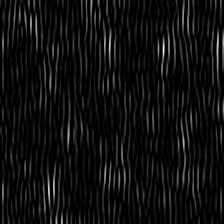

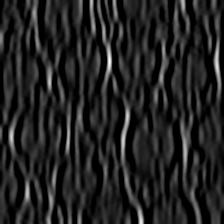

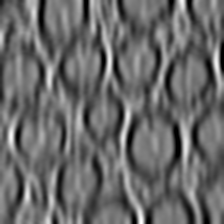

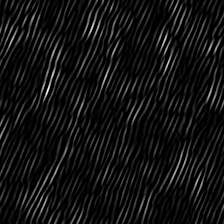

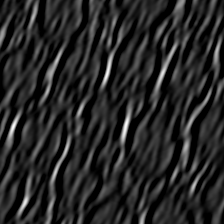

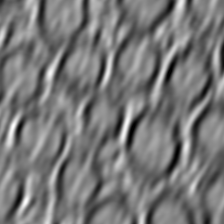

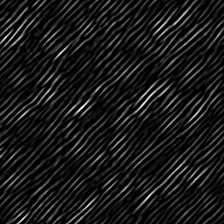

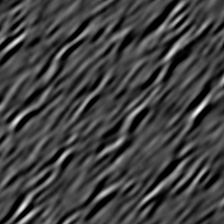

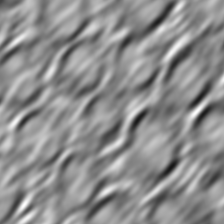

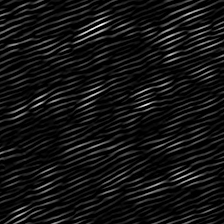

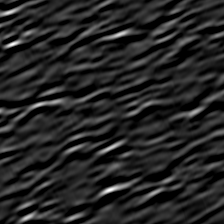

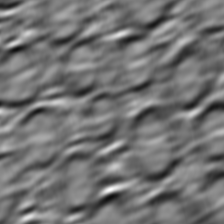

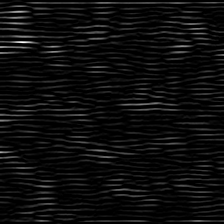

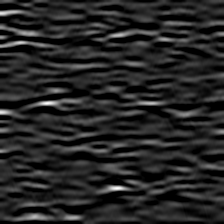

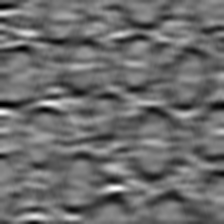

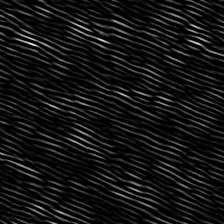

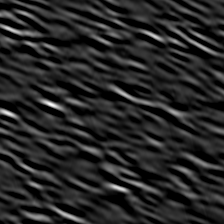

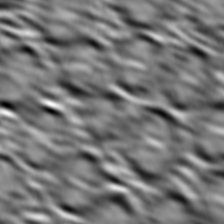

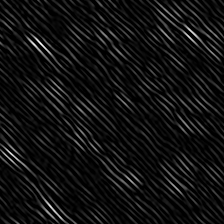

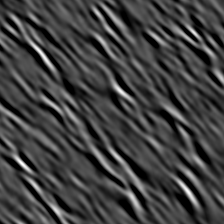

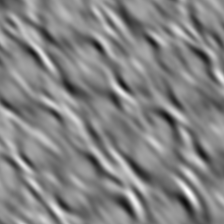

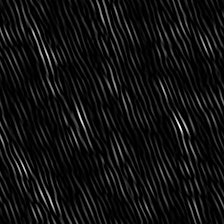

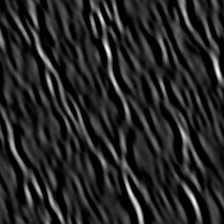

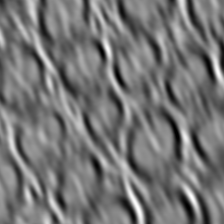

In [ ]:
# # from skimage.filters import gabor

# img = cv2.imread('/content/EBHI-SEG/Normal/image/GT2000000-1-400-001.png')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # wavelength = 5, 10, 15, etc

# ori = 8
# num_patch = 4
# img_size = gray.shape

# # features_set8 = []
# img_features = []

# for theta in np.arange(0, np.pi, np.pi/ori):
#   # for wave in np.arange(np.pi/4, np.pi, np.pi/4):
#   for wave in [5, 10, 15]:

#     # kernel1 = cv2.getGaborKernel((11, 11), sigma=3, theta=theta, lambd=wave, gamma=0.5)
#     # gabor_image1 = cv2.filter2D(gray, cv2.CV_32F, kernel1)

#     kernel2 = cv2.getGaborKernel((21, 21), sigma=4, theta=theta, lambd=wave, gamma=0.5, psi=0)
#     gabor_image2 = cv2.filter2D(gray, cv2.CV_32F, kernel2)

#     m = max(kernel2.reshape(-1))
#     cv2_imshow(kernel2*255/m)

#     m = max(gabor_image2.reshape(-1))
#     cv2_imshow(gabor_image2*255/m)

#     # gabor_mag = np.sqrt(gabor_image1 **2 + gabor_image2 **2)

#     # for rows in range(num_patch):
#     #   for cols in range(num_patch):

#     #     patch = int(img_size[0]/num_patch)
#     #     new_patch = gabor_mag[patch*rows:patch*(rows+1), patch*cols:patch*(cols+1)]

#     #     feat = [np.mean(new_patch), np.var(new_patch)]
#     #     img_features.extend(feat)

#     # features_set8.append(img_features)

# # gabor_real, gabor_imaginary = gabor(image, frequency=freq, theta=theta)

### Required

In [ ]:
p = '/content/drive/MyDrive/EBHI-SEG/'
# img_list = os.listdir(p+'image/')

features_set1 = []
features_set2 = []
features_set3 = []
features_set4 = []
features_set5 = []
features_set6 = []
features_set7 = []
features_set8 = []
# features_set9 = []
output = []

name_list = ['Normal/', 'Polyp/', 'Adenocarcinoma/', 'High-grade IN/', 'Low-grade IN/', 'Serrated adenoma/']
count = 0

ori = 8
num_patch = 4

for name in name_list:
  img_list = os.listdir(p+name+'image/')

  for img_ind in range(len(img_list)):

    image = cv2.imread(p+name+'image/'+img_list[img_ind])

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    # Extract LBP Features
    lbp_features = local_binary_pattern(gray_image, P=8, R=5, method='uniform')  # Extract LBP features
    hist, _ = np.histogram(lbp_features, bins=np.arange(0, 11), density=True)
    features_set1.append(hist.tolist())


    lbp_features = local_binary_pattern(gray_image, P=10, R=15, method='uniform')  # Extract LBP features
    hist, _ = np.histogram(lbp_features, bins=np.arange(0, 13), density=True)
    features_set2.append(hist.tolist())



    lbp_features = local_binary_pattern(gray_image, P=12, R=25, method='uniform')  # Extract LBP features
    hist, _ = np.histogram(lbp_features, bins=np.arange(0, 15), density=True)
    features_set3.append(hist.tolist())


    ind_features = []

    distances = [5, 10, 20]  # distance offsets
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # angles for offset pairs

    # Equalize hist
    hist_equal = cv2.equalizeHist(gray_image)

    # Calculate GLCM
    glcm = graycomatrix(hist_equal, distances=distances, angles=angles, symmetric=False, normed=True)

    # Calculate GLCM properties
    contrast = graycoprops(glcm, 'contrast')
    correlation = graycoprops(glcm, 'correlation')
    energy = graycoprops(glcm, 'energy')
    homogeneity = graycoprops(glcm, 'homogeneity')
    # dissimilarity = graycoprops(glcm, 'dissimilarity')
    # asm = graycoprops(glcm, 'ASM')

    ind_features.append(contrast)
    ind_features.append(correlation)
    ind_features.append(energy)
    ind_features.append(homogeneity)
    # ind_features.append(dissimilarity)
    # ind_features.append(asm)

    ind_features = np.array(ind_features).reshape(-1).tolist()

    features_set5.append(ind_features)


    # Extract HOG features
    fd, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)
    features_set6.append(fd)

    fd, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(32, 32),
                    cells_per_block=(2, 2), visualize=True, multichannel=False)
    features_set7.append(fd)


    img_features = []
    img_size = gray_image.shape

    # Extract Gabor features
    for theta in np.arange(0, np.pi, np.pi/ori):
      for wave in [5, 10, 15]:

        kernel1 = cv2.getGaborKernel((21, 21), sigma=4, theta=theta, lambd=wave, gamma=0.5, psi=0)
        gabor_image1 = cv2.filter2D(gray_image, cv2.CV_32F, kernel1)

        mean_val = np.mean(gabor_image1)
        var_val = np.var(gabor_image1)
        ener_val = np.sum(gabor_image1**2)

        gabor_flat = gabor_image1.flatten()
        # ent_val = entropy(gabor_flat)
        kurt_val = kurtosis(gabor_flat)
        skew_val = skew(gabor_flat)

        normalized_img = cv2.normalize(gabor_image1, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        contrast = cv2.compareHist(normalized_img, normalized_img, cv2.HISTCMP_CORREL)
        homogeneity = cv2.compareHist(normalized_img, normalized_img, cv2.HISTCMP_INTERSECT)

        feat = [mean_val, var_val, ener_val, kurt_val, skew_val, contrast, homogeneity]
        img_features.extend(feat)


    features_set8.append(img_features)

    output.append(count)

  count += 1


<ipython-input-4-2663bb90ffc4>:81: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(16, 16),
<ipython-input-4-2663bb90ffc4>:85: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(32, 32),


In [ ]:
# LBP feature set
array1 = np.array(features_set1)
array2 = np.array(features_set2)
array3 = np.array(features_set3)

# GLCM feature set
array5 = np.array(features_set5)

# HOG feature set
array6 = np.array(features_set6)
pca1 = PCA(n_components=400)
array6_pca = pca1.fit_transform(array6)

array7 = np.array(features_set7)
pca2 = PCA(n_components=400)
array7_pca = pca2.fit_transform(array7)

# Gabor filter feature set
array8 = np.array(features_set8)

# combining the features
joined_features_set = np.hstack((array1, array2, array3, array5, array8))

features = joined_features_set.copy()

In [ ]:
def calc_avg_prec_rec(predicted_values, ground_truth):
    # Calculate precision and recall for each class
    precision = precision_score(ground_truth, predicted_values, average='weighted')
    recall = recall_score(ground_truth, predicted_values, average='weighted')

    return precision, recall

In [ ]:
# joined_features_set = np.hstack((array1, array2, array3, array5, array8))
# features = joined_features_set.copy()

X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.2, shuffle=True, stratify=output, random_state=32)


# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)
# print(len(X_train))


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


xgb_classifier = xgb.XGBClassifier(n_estimators=300)

print("XGB:")

# Train the classifier
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
prec, rec = calc_avg_prec_rec(y_pred, y_test)
print("Precision:", prec)
print("Recall:", rec)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print()


gb_classifier = GradientBoostingClassifier(n_estimators=300)
print('GB:')

# Train the Gradient Boosting classifier
gb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
prec, rec = calc_avg_prec_rec(y_pred, y_test)
print("Precision:", prec)
print("Recall:", rec)
print()



# Initialize SVM classifier
svm_classifier = SVC(kernel='rbf')
print("SVM:")

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
prec, rec = calc_avg_prec_rec(y_pred, y_test)
print("Precision:", prec)
print("Recall:", rec)
print()


model = RandomForestClassifier(n_estimators=400)
model.fit(X_train_scaled, y_train)
print("RF:")
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
prec, rec = calc_avg_prec_rec(y_pred, y_test)
print("Precision:", prec)
print("Recall:", rec)
print()


model = lgb.LGBMClassifier(n_estimators=70)
# model = KNeighborsClassifier(n_neighbors=15, weights='uniform')
model.fit(X_train_scaled, y_train)
print("LGM:")
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
prec, rec = calc_avg_prec_rec(y_pred, y_test)
print("Precision:", prec)
print("Recall:", rec)

print('-----------------------------------------------------------------------------------------------------------------------------------')

XGB:
Accuracy: 0.8340807174887892
Precision: 0.8352484054576524
Recall: 0.8340807174887892
Confusion Matrix:
[[  8   5   0   0   2   0]
 [  1  83   4   0   7   0]
 [  0   6 151   1   1   0]
 [  0   0  15  14   8   0]
 [  0   9   9   1 108   1]
 [  0   0   2   1   1   8]]

GB:
Accuracy: 0.8295964125560538
Precision: 0.8214244979588767
Recall: 0.8295964125560538

SVM:
Accuracy: 0.8116591928251121
Precision: 0.8190781452976139
Recall: 0.8116591928251121

RF:
Accuracy: 0.7757847533632287
Precision: 0.7763662266580446
Recall: 0.7757847533632287

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58140
[LightGBM] [Info] Number of data points in the train set: 1782, number of used features: 228
[LightGBM] [Info] Start training from score -3.374618
[LightGBM] [Info] Start training from score -1.547955
[LightGBM] [Info] Start training from score -1.030293
[